# 1. Load in Libraries

In [3]:
#!pip install squarify
#!pip install textacy
#!pip install emot
#!pip install emoji
import nltk
from nltk.tokenize import word_tokenize  
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
nlp = spacy.load('en_core_web_sm')
from  textacy import preprocessing as tprep
import gensim

import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import os
#os.chdir('C:/Users/T430/Google Drive/00 - Masters/Disseration/00 - Actual Disseration')
from itertools import chain
import pandas as pd
from nltk import word_tokenize
from nltk import FreqDist
#from emot.emo_unicode import UNICODE_EMOJI, EMOTICONS_EMO
import emoji

In [197]:
SMILEYS = {    u":‑)":"Happy face",
    u":-))":"Elated face",
    u":-)))":"Overjoyed face",
    u":)":"Happy face",
    u":))":"Elated face",
    u":)))":"Overjoyed face",
    u":-]":"Happy face",
    u":]":"Happy face",
    u":-3":"Happy face ",
    u":3":"Happy face ",
    u":->":"Happy face ",
    u":>":"Happy face ",
    u"8-)":"Happy face ",
    u":o)":"Happy face ",
    u":-}":"Happy face ",
    u":}":"Happy face ",
    u":-)":"Happy face ",
    u":c)":"Happy face ",
    u":^)":"Happy face ",
    u"=]":"Happy face ",
    u"=)":"Happy face ",
    u":‑D":"Laughing",
    u":D":"Laughing",
    u"8‑D":"Laughing",
    u"8D":"Laughing",
    u"X‑D":"Laughing",
    u"XD":"Laughing",
    u"=D":"Laughing",
    u"=3":"Laughing",
    u"B^D":"Laughing",
    u":-))":"Elated face",
    u":-(":"sad face",
    u":‑(":"sad face",
    u":(":"sad face",
    u":‑c":"sad face",
    u":c":"sad face",
    u":‑<":"sad face",
    u":<":"sad face",
    u":‑[":"sad face",
    u":[":"sad face",
    u":-||":"sad face",
    u">:[":"sad face",
    u":{":"sad face",
    u":@":"sad face",
    u">:(":"sad face",
    u":'‑(":"Crying",
    u":'(":"Crying",
    u":'‑)":"happy face",
    u":')":"happy face",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-*":"Kiss",
    u":*":"Kiss",
    u":X":"Kiss",
    u";‑)":"Wink or smirk",
    u";)":"Wink or smirk",
    u"*-)":"Wink or smirk",
    u"*)":"Wink or smirk",
    u";‑]":"Wink or smirk",
    u";]":"Wink or smirk",
    u";^)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑|":"Straight face",
    u":|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑)":"Angel, saint or innocent",
    u"O:)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑)":"Angel, saint or innocent",
    u"0:)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;^)":"Angel, saint or innocent",
    u">:‑)":"Evil or devilish",
    u">:)":"Evil or devilish",
    u"}:‑)":"Evil or devilish",
    u"}:)":"Evil or devilish",
    u"3:‑)":"Evil or devilish",
    u"3:)":"Evil or devilish",
    u">;)":"Evil or devilish",
    u"|;‑)":"Cool",
    u"|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑)":"Party all night",
    u"%‑)":"Drunk or confused",
    u"%)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑|":"Dump",
    u"(>_<)":"Troubled",
    u"(>_<)>":"Troubled",
    u"(';')":"Baby",
    u"(^^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"(^_^;)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"(-_-;)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"(~_~;) (・.・;)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"(-_-)zzz":"Sleeping",
    u"(^_-)":"Wink",
    u"((+_+))":"Confused",
    u"(+o+)":"Confused",
    u"(o|o)":"Ultraman",
    u"^_^":"Joyful",
    u"(^_^)/":"Joyful",
    u"(^O^)／":"Joyful",
    u"(^o^)／":"Joyful",
    u"(__)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_(._.)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<(_ _)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m(__)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m(__)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m(_ _)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"('_')":"Sad or Crying",
    u"(/_;)":"Sad or Crying",
    u"(T_T) (;_;)":"Sad or Crying",
    u"(;_;":"Sad of Crying",
    u"(;_:)":"Sad or Crying",
    u"(;O;)":"Sad or Crying",
    u"(:_;)":"Sad or Crying",
    u"(ToT)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q.Q":"Sad or Crying",
    u"T.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"(-.-)":"Shame",
    u"(-_-)":"Shame",
    u"(一一)":"Shame",
    u"(；一_一)":"Shame",
    u"(=_=)":"Tired",
    u"(=^·^=)":"cat",
    u"(=^··^=)":"cat",
    u"=_^= ":"cat",
    u"(..)":"Looking down",
    u"(._.)":"Looking down",
    u"^m^":"Giggling with hand covering mouth",
    u"(・・?":"Confusion",
    u"(?_?)":"Confusion",
    u">^_^<":"Normal Laugh",
    u"<^!^>":"Normal Laugh",
    u"^/^":"Normal Laugh",
    u"（*^_^*）" :"Normal Laugh",
    u"(^<^) (^.^)":"Normal Laugh",
    u"(^^)":"Normal Laugh",
    u"(^.^)":"Normal Laugh",
    u"(^_^.)":"Normal Laugh",
    u"(^_^)":"Normal Laugh",
    u"(^^)":"Normal Laugh",
    u"(^J^)":"Normal Laugh",
    u"(*^.^*)":"Normal Laugh",
    u"(^—^）":"Normal Laugh",
    u"(#^.^#)":"Normal Laugh",
    u"（^—^）":"Waving",
    u"(;_;)/~~~":"Waving",
    u"(^.^)/~~~":"Waving",
    u"(-_-)/~~~ ($··)/~~~":"Waving",
    u"(T_T)/~~~":"Waving",
    u"(ToT)/~~~":"Waving",
    u"(*^0^*)":"Excited",
    u"(*_*)":"Amazed",
    u"(*_*;":"Amazed",
    u"(+_+) (@_@)":"Amazed",
    u"(*^^)v":"Laughing,Cheerful",
    u"(^_^)v":"Laughing,Cheerful",
    u"((d[-_-]b))":"Headphones,Listening to music",
    u'(-"-)':"Worried",
    u"(ーー;)":"Worried",
    u"(^0_0^)":"Eyeglasses",
    u"(＾ｖ＾)":"Happy",
    u"(＾ｕ＾)":"Happy",
    u"(^)o(^)":"Happy",
    u"(^O^)":"Happy",
    u"(^o^)":"Happy",
    u")^o^(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o.O":"Surpised",
    u"(o.o)":"Surprised",
    u"oO":"Surprised",
    u"(*￣m￣)":"Dissatisfied",
    u"(‘A`)":"Snubbed or Deflated"
          }


# 2. Open up the data

In [198]:
params = {'Asset tags': 'btc|bitcoin',
          'Asset name': 'btc', #this will appear in the folder name so can determine what is trained on
          'Remove list' :[
              'btc',
              'bitcoin', 
              'crypto', 
              'cryptocurrency',
              'coin'
                          
                          
                        ],
          'num_topics': 16
}

In [190]:
#df[df.text.str.contains('gonna')]

In [2]:
!pip3 install pmdarima

In [191]:
#df['text'][3810]

In [192]:
#df[df.text.str.contains('don\'t buy')]

In [96]:
# bigram = Phrases(docs, min_count=30, delimiter=b' ')
# trigram = Phrases(bigram[docs], min_count=1, delimiter=b' ')


# for sent in docs:
#     bigrams_ = [b for b in bigram[sent] if b.count(' ') == 1]
#     trigrams_ = [t for t in trigram[bigram[sent]] if t.count(' ') == 2]

#     print(bigrams_)
#     print(trigrams_)

In [122]:
#nlp.tokenizer.rules = {key: value for key, value in nlp.tokenizer.rules.items() if "'" not in key and "’" not in key and "‘" not in key}


In [193]:
# test =  [t.text for t in nlp("don't")] 

In [215]:
# from gensim.models.phrases import Phraser
# #

In [218]:
# bigram_phraser = Phraser(bigram)


# print(bigram_phraser)

# for sent in docs:
#     tokens_ = bigram_phraser[sent]

#     print(tokens_)

In [239]:
trigram = gensim.models.Phrases(bigram[docs]) 

In [240]:
# n=0

# for ngrams, _ in trigram.vocab.items():
#     unicode_ngrams = ngrams.decode('utf-8')
#     if '_' in unicode_ngrams:
#         n = n+1
# print(n)

75946


here
here
Populating the interactive namespace from numpy and matplotlib
here
exported clean data

C:\Users\T430\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['title', 'source', 'save', 'show', 'figure']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +



here
Number of unique words in initital documents: 11891
Number of unique words after removing rare and common words: 2801
[(5, [('smiling_face_with_sunglasse', 0.1225271218889598), ('hour_fee', 0.07147415443522655), ('rate_sit', 0.07147415443522655), ('fee', 0.06062539885130823), ('sit', 0.0574345883854499), ('rate', 0.05615826419910657), ('vbyte', 0.053605615826419914), ('blackjack', 0.042118698149329926), ('hour', 0.041480536056158264), ('blackjack_blackjack', 0.04020421186981493)]), (12, [('have_win', 0.16501650165016502), ('play_game', 0.11221122112211221), ('win', 0.10148514851485149), ('game', 0.09570957095709572), ('play', 0.08993399339933994), ('backhand_index_pointing_right', 0.07590759075907591), ('have_win_0.005_play', 0.052805280528052806), ('0.005_play', 0.052805280528052806), ('0.005', 0.052805280528052806), ('full_moon', 0.020627062706270627)]), (0, [('gon_na', 0.13257305773342837), ('na', 0.04775481111903065), ('gon', 0.04775481111903065), ('fire', 0.04632929436920884

Loading BokehJS ...

C:\Users\T430\anaconda3\lib\site-packages\bokeh\io\saving.py:126: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
C:\Users\T430\anaconda3\lib\site-packages\bokeh\io\saving.py:139: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


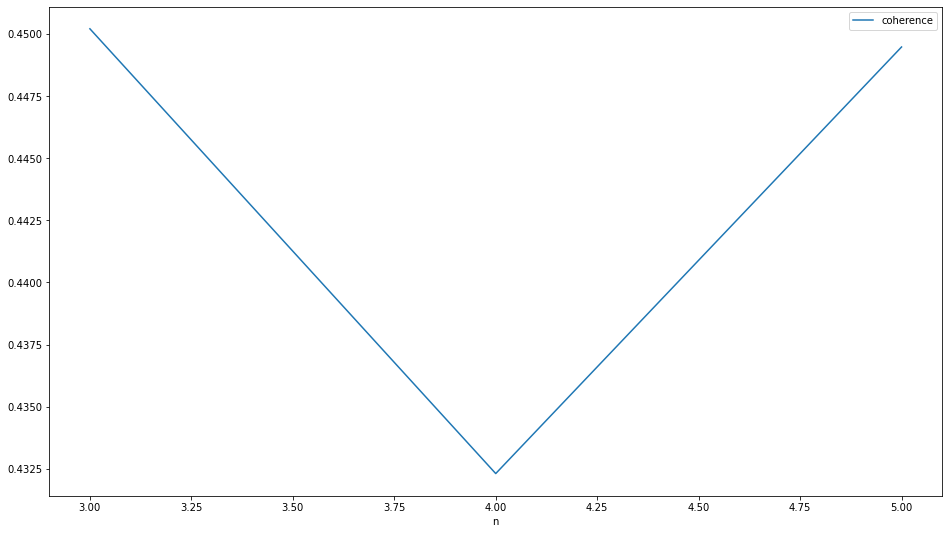

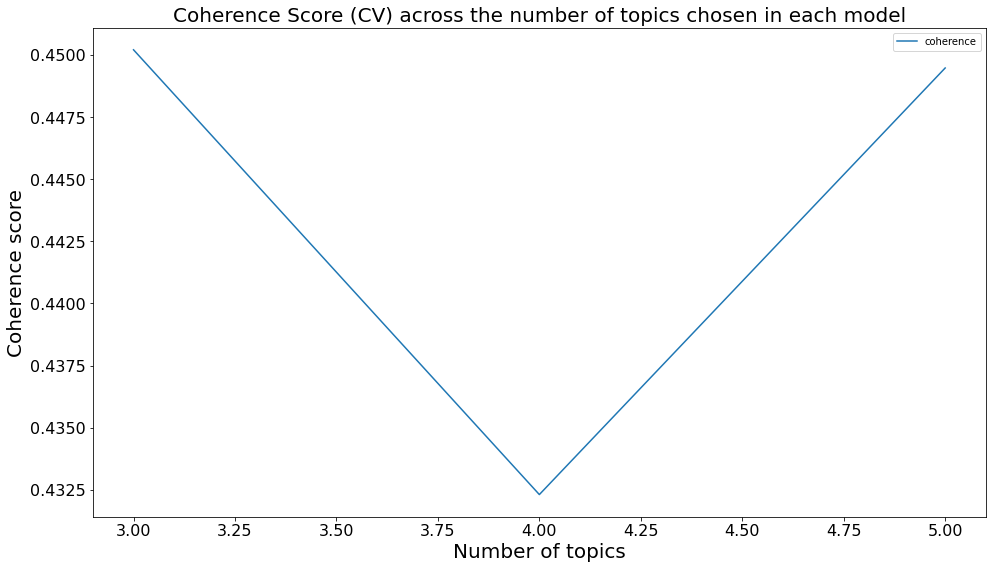

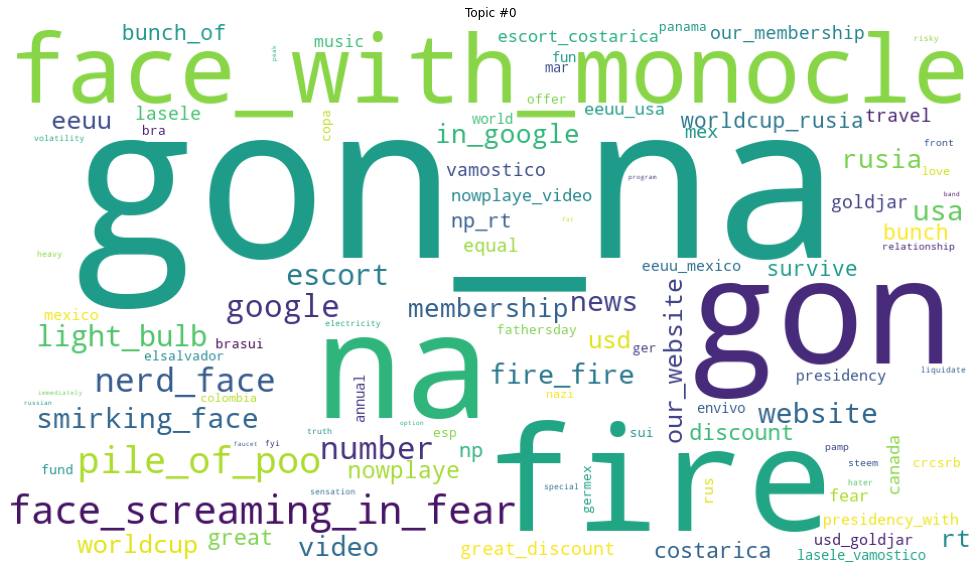

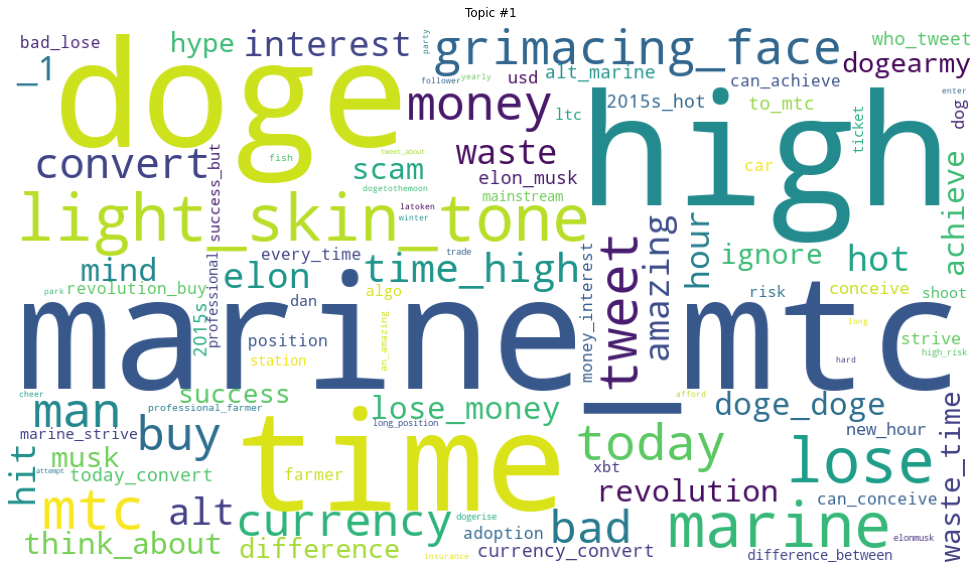

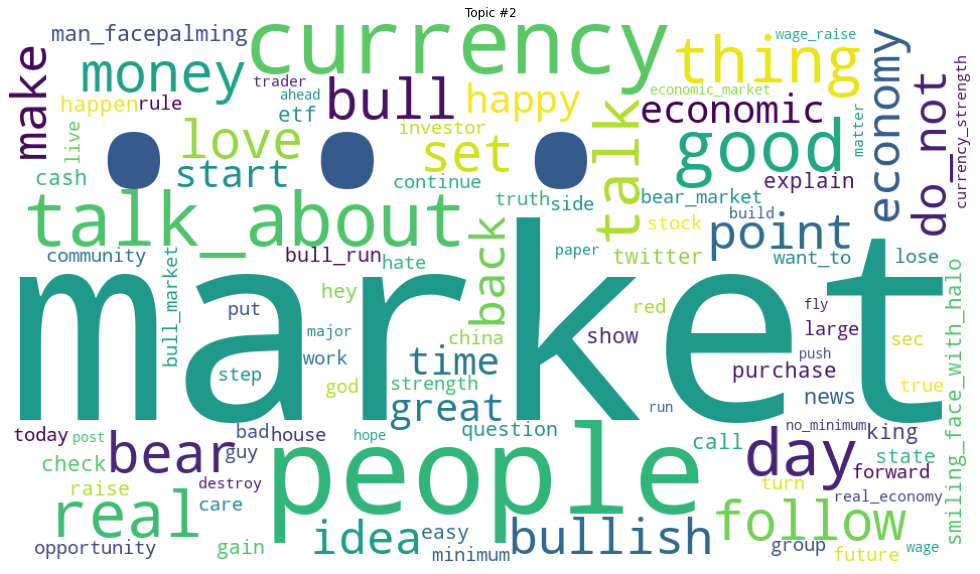

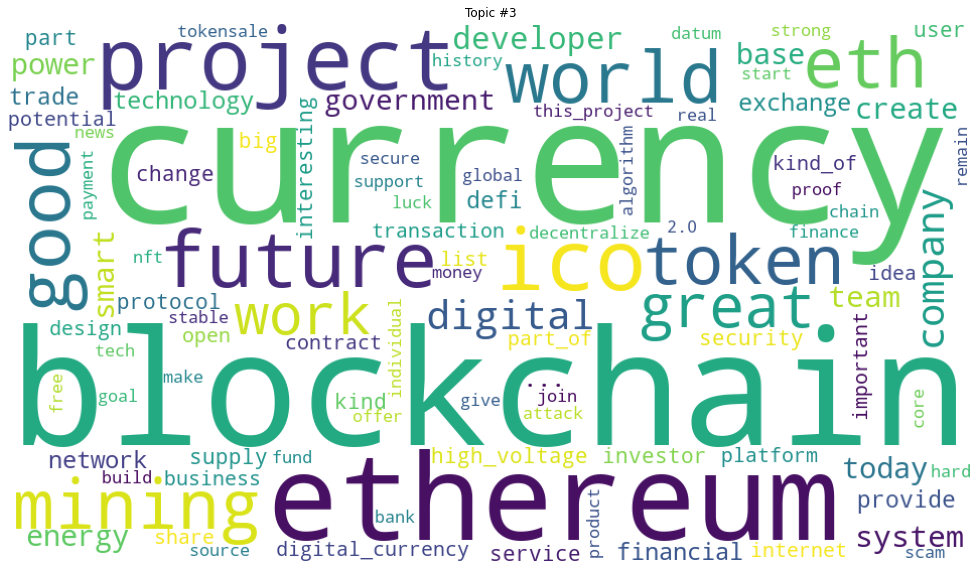

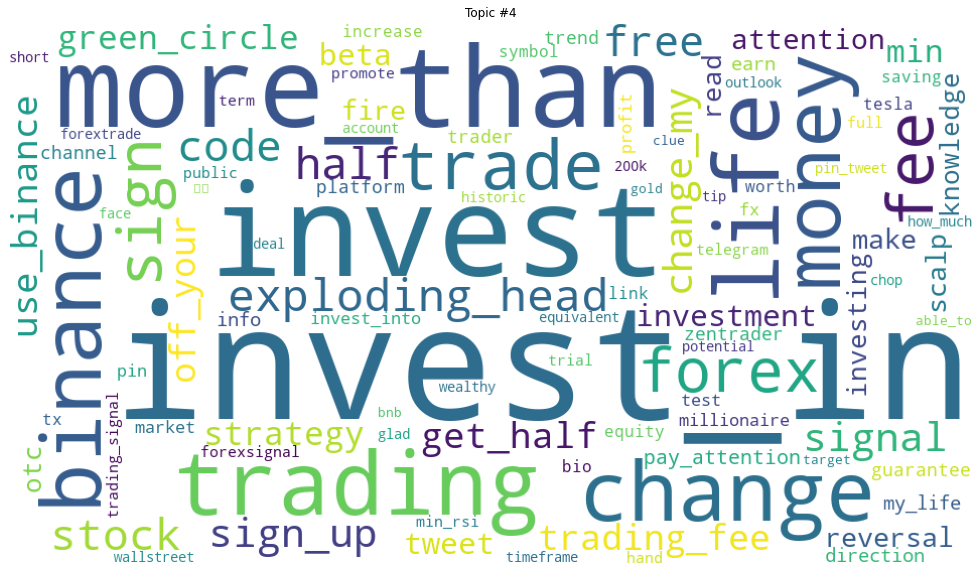

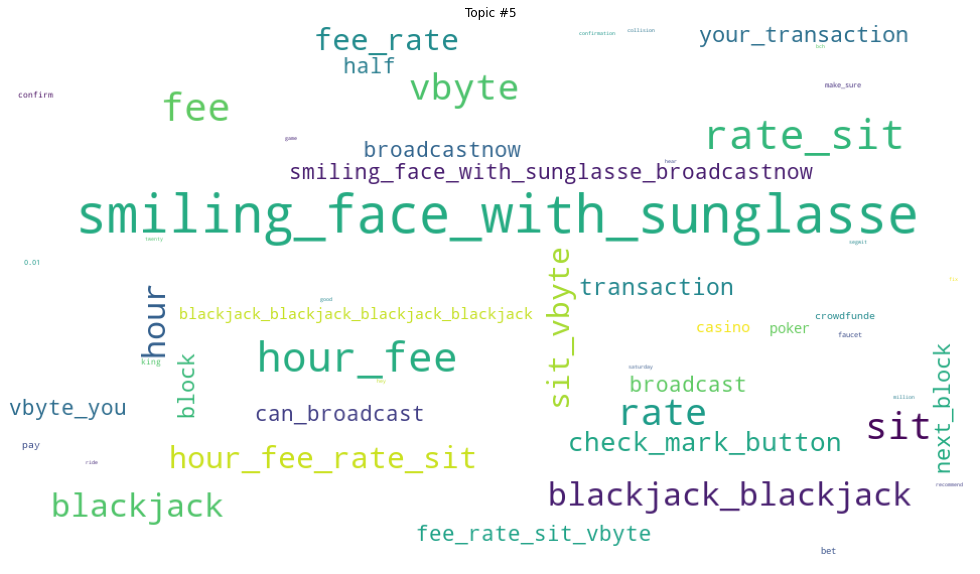

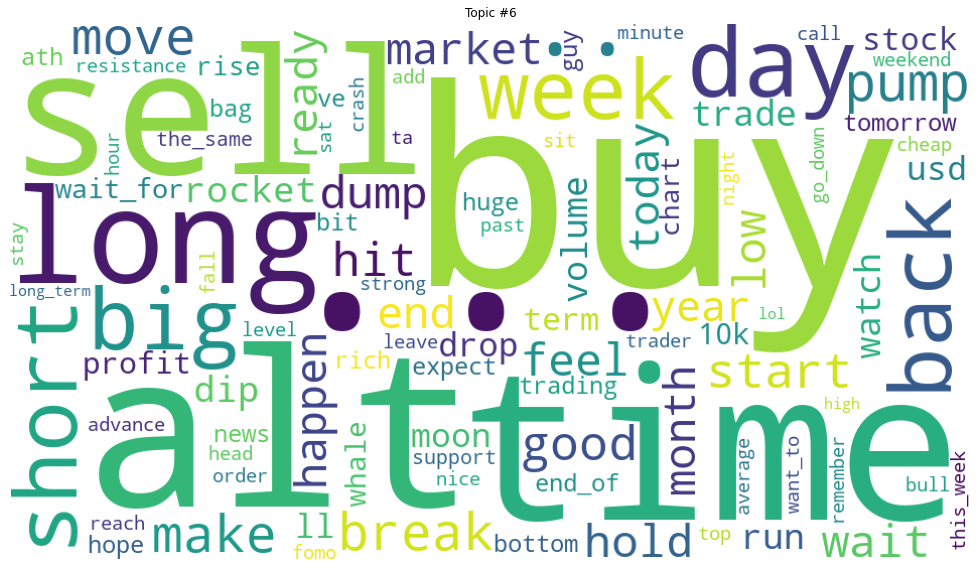

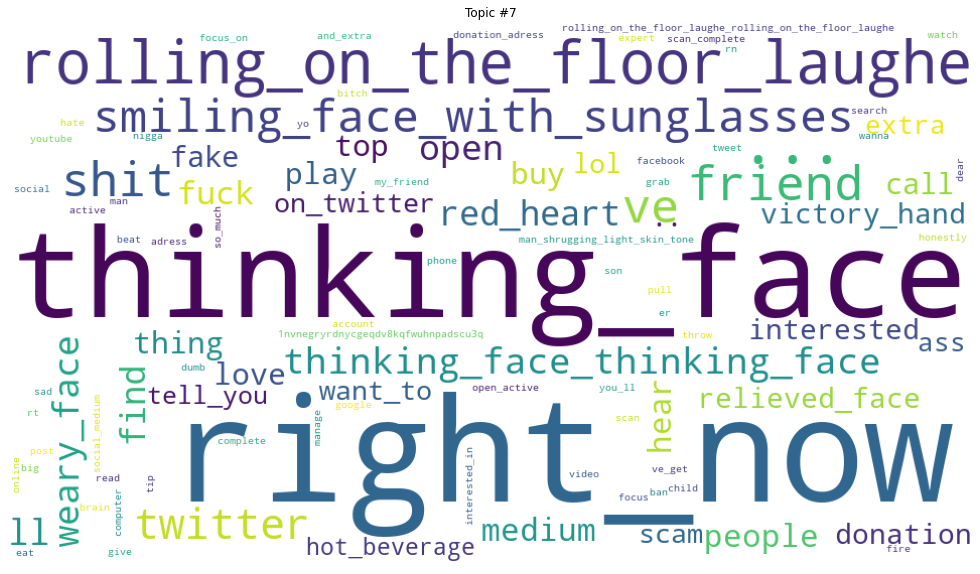

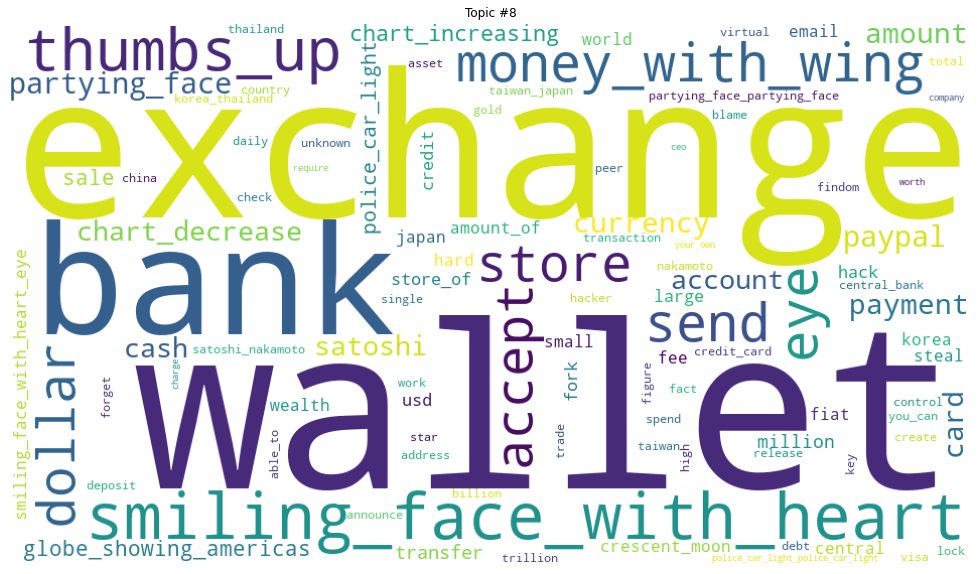

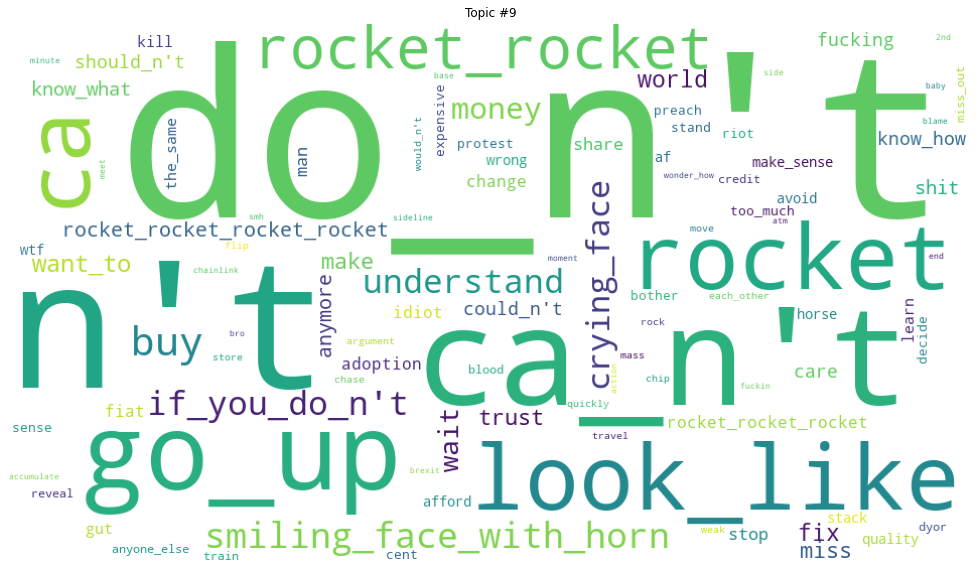

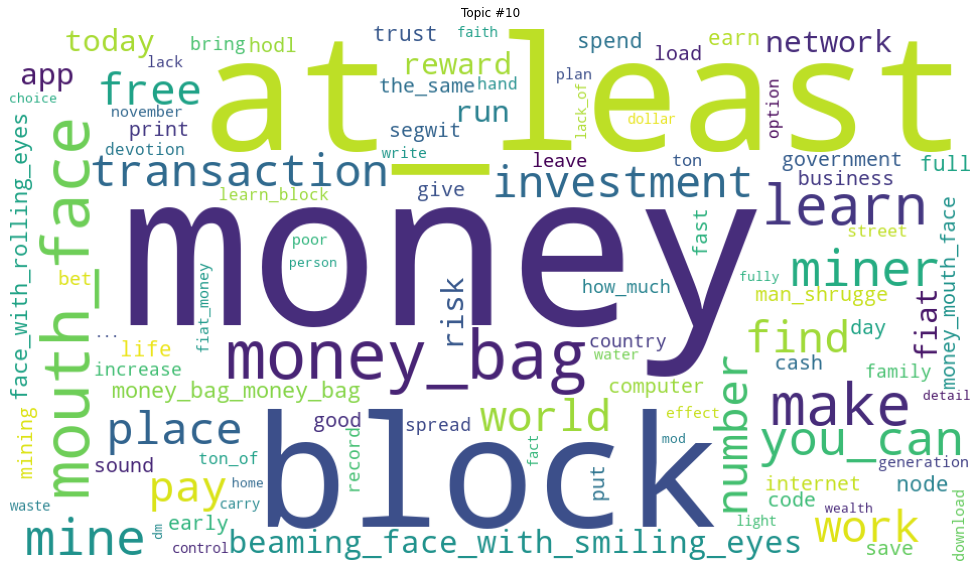

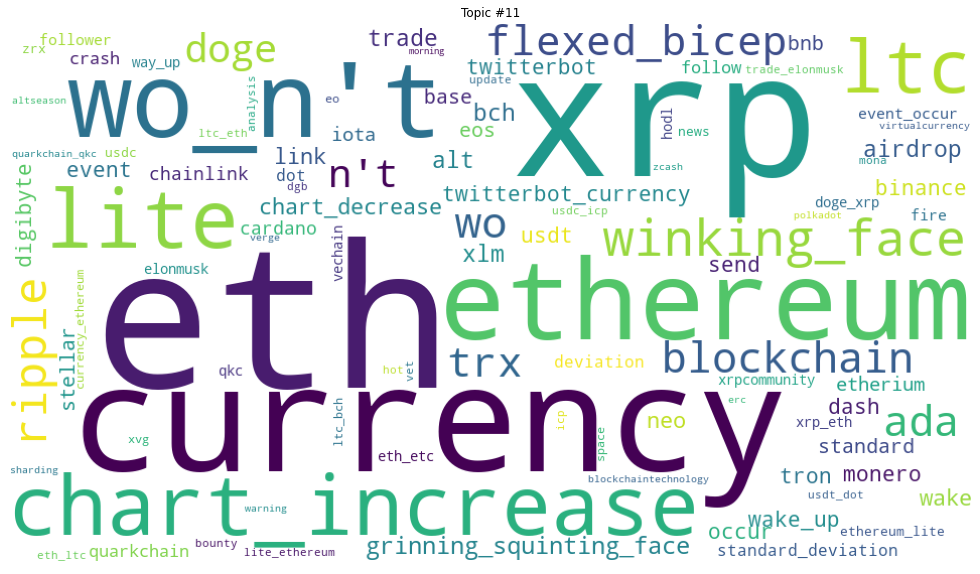

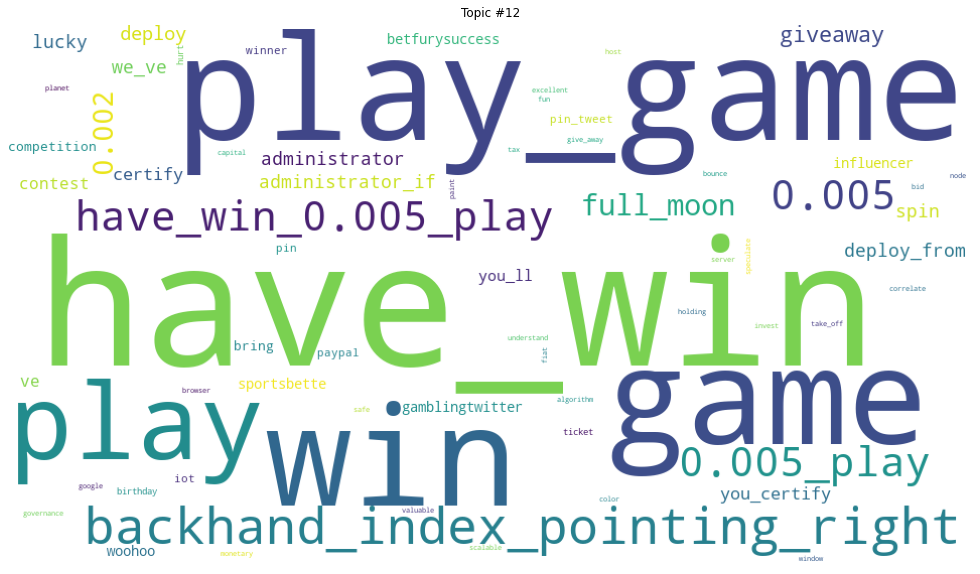

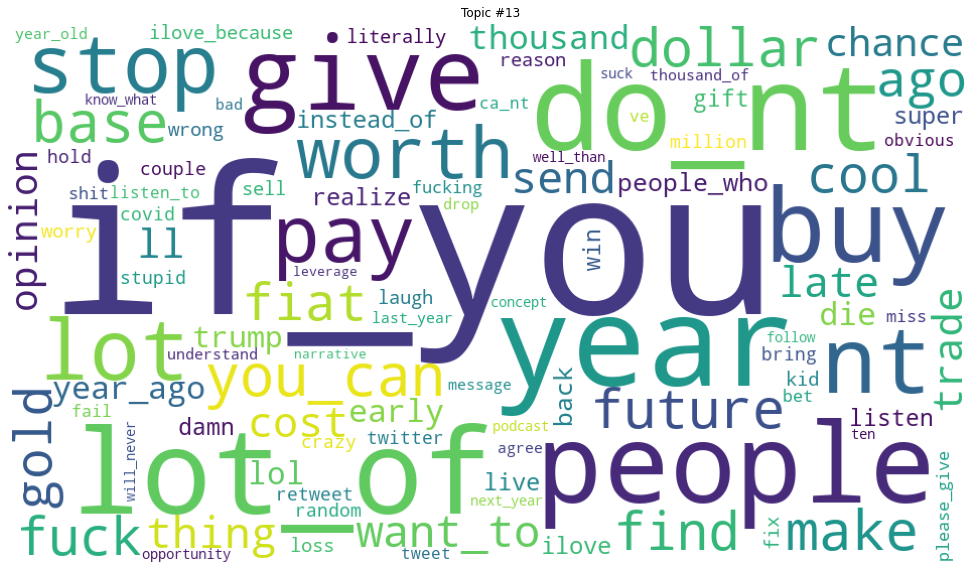

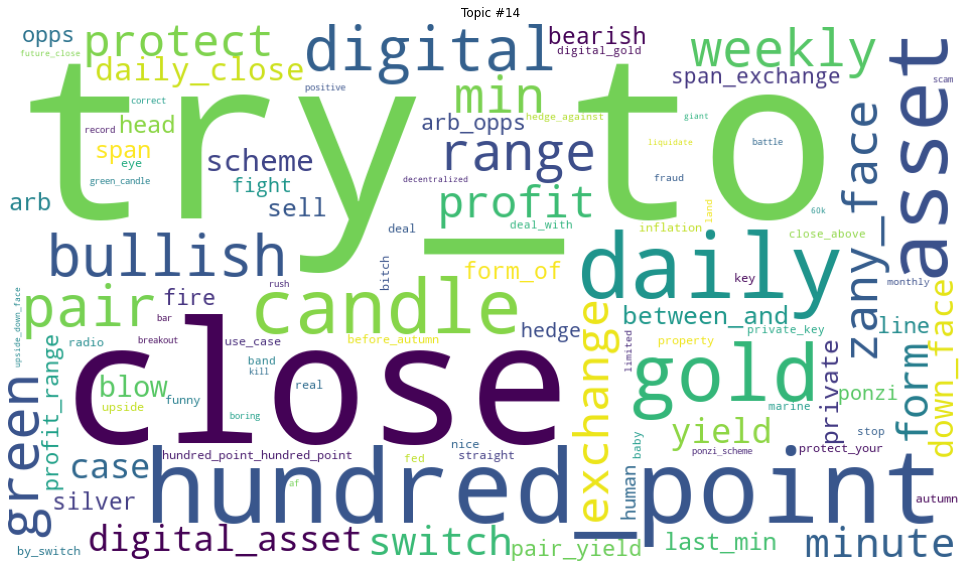

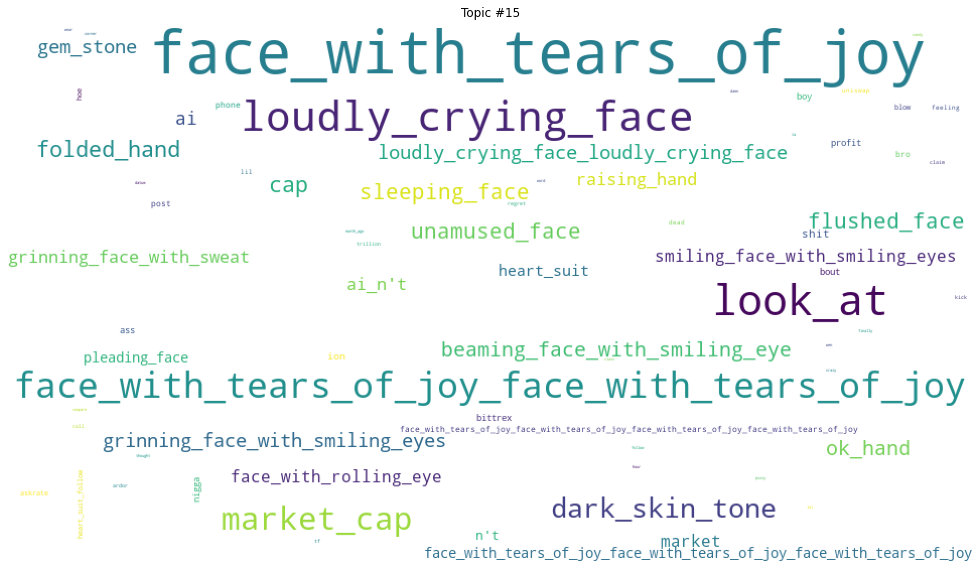

In [209]:
from datetime import datetime as dt
import os
mask = "D-%y%m%d-T-%H.%M.%S"
print("here")
dte = dt.now().strftime(mask)

results_folder = "results/" + params['Asset name'] + "/" + params['Asset name'] + dte
num_topics = params['num_topics']
os.makedirs(f"{results_folder}")
import pandas as pd

df = pd.read_csv(f'data/ryan_game_stop_data.csv')
   



#df = df[~df.text.str.contains(r'[0-9]')]

#reset index
df = df.reset_index(drop=True)

def emoticons(text):
    words = text.split()
    reformed = [SMILEYS[word] if word in SMILEYS else word for word in words]
    text = " ".join(reformed)
    return text

df['text1'] = df['text'].map(emoticons)

def demojise(tweet):
    tweet = emoji.demojize(tweet)
    tweet = tweet.replace(":"," ")
    tweet = ' '.join(tweet.split())
    return tweet
df['text1'] = df['text'].map(demojise)

#program to clean tweets
import html

def clean(text):
    # convert html escapes like &amp; to characters.
    text = html.unescape(text)
    # tags like <tab>
    text = re.sub(r'<[^<>]*>', ' ', text)
    # markdown URLs like [Some text](https://....)
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)
    # text or code in brackets like [0]
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)
    # standalone sequences of specials, matches &# but not #cool
    text = re.sub(r'(?:^|\s)[&#<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text)
    # standalone sequences of hyphens like --- or ==
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)
    # sequences of white spaces
    text = re.sub(r'\s+', ' ', text)
    #no hashtags
    #text = re.sub('\#[\w\_]+',' ', text)
    #no dollar
    text = re.sub('\$[\w\_]+',' ', text)
    #text = text.replace("'", "")
    return text.strip()

#apply clean
df['text1'] = df['text1'].map(clean)

from  textacy import preprocessing as tprep
def normalise(text):
    text = tprep.normalize.hyphenated_words(text)
    text = tprep.normalize.quotation_marks(text)
    text = tprep.normalize.unicode(text)
    text = tprep.remove.accents(text)
    return text

df['text1'] = df['text1'].map(normalise)


#convert to lowercase
df = df.applymap(lambda s:s.lower() if type(s) == str else s) #convert all to lowercase

print("here")

#remove tweets that aren't useful
df = df[~df.text1.str.contains('Current price:')]
df = df[~df.text1.str.contains('Current price')]
df = df[~df.text1.str.contains('current price')]
df = df[~df.text1.str.contains('current rate:')]
df = df[~df.text1.str.contains('Current rate:')]
df = df[~df.text1.str.contains('volume alert')]
df = df[~df.text1.str.contains('price update')]
df = df[~df.text1.str.contains('prices update')]
df = df[~df.text1.str.contains('price action')]
df = df[~df.text1.str.contains('price action')]
df = df[~df.text1.str.contains('price increase')]
df = df[~df.text1.str.contains('price decrease')]
df = df[~df.text1.str.contains('density')]
#df = df[~df.text1.str.contains('volume')]
df = df[~df.text1.str.contains('last hour')]
df = df[~df.text1.str.contains('latest block info')]
df = df[~df.text1.str.contains('closed sell')]
df = df[~df.text1.str.contains('alert')]
df = df[~df.text1.str.contains('hourly update')]
df = df[~df.text1.str.contains('%')]


searchfor = ['current', 'price']
df = df[~df.text1.str.contains('|'.join(searchfor))]



df = df.reset_index(drop=True)

#keep tweets that are of interest for that asset
#df_btc = df[df.text1.str.contains(params['Asset tags'], na=False)]
df_btc = df 
df_btc = df_btc.reset_index(drop=True)

#delete words i don't think are useful to the analysis
import re
To_remove_lst = params['Remove list']
p = re.compile('|'.join(map(re.escape, To_remove_lst)))
df_btc['text1'] = [p.sub('', text) for text in df_btc['text1']] 

#get rid of tweets that have 10 or more numbers, these are tweets that just report value
def count_digits(string):
    return sum(item.isdigit() for item in string)


df_btc['count_num'] = df_btc['text'].apply(count_digits)
df_btc = df_btc[['date','text', 'text1', 'count_num']].loc[df_btc['count_num'] < 10] # so take it to be >= get rid 
df_btc = df_btc.reset_index(drop=True)


#sample down for speed
#df = df_btc.sample(frac=0.1, replace=False)
#df.to_csv(f'{results_folder}/00 - Initial sample DF.csv')
df=df_btc
df = df.reset_index(drop=True)

#nlp.tokenizer.rules = {key: value for key, value in nlp.tokenizer.rules.items() if "'" not in key and "’" not in key and "‘" not in key}



#test = nlp.tokenizer.rules
#del test['gonna'][0][65]
#del test['gonna'][1][65]
#del test['Gonna'][0][65]
#del test['Gonna'][1][65]



#del test["gonna"]
#del test["Gonna"]
#del test["cant"]
#del test["havent"]
#del test["shouldnt"]
#del test["aint"]

#nlp.tokenizer.rules = test

#delete stopwords
df['text2'] = df['text1'].map(nlp)
#KEEP STOP WORDS ACCORDING TO STUDY IT'S BETTER FOR STOP WORDS AND I THINK IT'S BETTER FOR SENTIMENT ANALYSIS
# def stop_words(doc):
#     non_stop = [t for t in doc if not t.is_stop and not t.is_punct]
#     return non_stop
# df['text3'] = df['text2'].map(stop_words)
df['text3'] = df['text2']

#my own lemmatisation because looks like the one below doesnt work
def lemma(doc):
    doclems = [t.lemma_ for t in doc]
    return doclems
df['text4'] = df['text3'].map(lemma)
#df['text4'] = df['text3']
%pylab inline
print("here")
import pandas as pd
import pickle as pk
from scipy import sparse as sp

#converting to a string
df['text5'] = [' '.join(map(str, l)) for l in df['text4']]

cleandf = df[['text5']]
cleandf.to_csv(f'{results_folder}/00 - Cleaned Text.csv')
print("exported clean data")

docs = array(df['text5'])


#more preprocessing of the docs
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import TweetTokenizer

def docs_preprocessor(docs):
    tokenizer = TweetTokenizer()
    for idx in range(len(docs)):
        docs[idx] = docs[idx].lower()  # Convert to lowercase.
        docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

    # Remove numbers, but not words that contain numbers.
    docs = [[token for token in doc if not token.isdigit()] for doc in docs]
    
    # Remove words that are only one character.
    docs = [[token for token in doc if len(token) > 1] for doc in docs]
    
    # Lemmatize all words in documents.
    #lemmatizer = WordNetLemmatizer()
    #docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]
  
    return docs
docs = docs_preprocessor(docs)

from gensim.models import Phrases
# Add bigrams and trigrams to docs (only ones that appear 10 times or more).
bigram = Phrases(docs, min_count=30)
trigram = Phrases(bigram[docs])

for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
    for token in trigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.id2word
            docs[idx].append(token)
            
from gensim.corpora import Dictionary
print("here")
# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)

print('Number of unique words in initital documents:', len(dictionary))

# Filter out words that occur less than 10 documents, or more than 3% of the documents. The original here was 20% 

dictionary.filter_extremes(no_below=5, no_above=0.8)
dictionary.save_as_text(f'{results_folder}/dict_text.txt') 

print('Number of unique words after removing rare and common words:', len(dictionary))


temp = dictionary[0]
id2word = dictionary.id2token

#-----------------------------------------------------------------------------------------------------------------------------------------------


corpus = [dictionary.doc2bow(doc) for doc in docs]


from gensim.models import LdaModel
import os





from gensim.models.ldamulticore import LdaMulticore
lda_para_model_n = []
for n in range(3, 30):
    lda_model_c = LdaMulticore(corpus=corpus, id2word=id2word, chunksize=2000, eta='auto', iterations=400, num_topics=n, passes=20, eval_every=None,random_state=42)
    lda_coherence = CoherenceModel(model=lda_model_c, texts=docs,dictionary=dictionary, coherence='c_v')
    lda_para_model_n.append((n, lda_model_c, lda_coherence.get_coherence()))
fig = pd.DataFrame(lda_para_model_n, columns=["n", "model","coherence"]).set_index("n")[["coherence"]].plot(figsize=(16,9))
bestco_df= pd.DataFrame(lda_para_model_n, columns=["n", "model","coherence"]).set_index("n")[["coherence"]]
bestco_df.to_csv(f'{results_folder}/00a - Best Coherence.csv')
fig = pd.DataFrame(lda_para_model_n, columns=["n", "model","coherence"]).set_index("n")[["coherence"]].plot(figsize=(16,9))
plt.title('Coherence Score (CV) across the number of topics chosen in each model', fontsize=20)
plt.xlabel('Number of topics', fontsize=20)
plt.ylabel('Coherence score', fontsize=20)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
fig.figure.savefig(f'{results_folder}/Best_coherence_cv.png')
bestop = bestco_df.idxmax()[0]





from gensim.models.ldamulticore import LdaMulticore
lda_para_model_n = []
for n in range(3, 30):
    lda_model_c = LdaMulticore(corpus=corpus, id2word=id2word, chunksize=2000, eta='auto', iterations=400, num_topics=n, passes=20, eval_every=None,random_state=42)
    lda_coherence = CoherenceModel(model=lda_model_c, texts=docs,dictionary=dictionary, coherence='u_mass')
    lda_para_model_n.append((n, lda_model_c, lda_coherence.get_coherence()))
fig = pd.DataFrame(lda_para_model_n, columns=["n", "model","coherence"]).set_index("n")[["coherence"]].plot(figsize=(16,9))
bestco_df= pd.DataFrame(lda_para_model_n, columns=["n", "model","coherence"]).set_index("n")[["coherence"]]
bestco_df.to_csv(f'{results_folder}/00a - Best Coherence.csv')
fig = pd.DataFrame(lda_para_model_n, columns=["n", "model","coherence"]).set_index("n")[["coherence"]].plot(figsize=(16,9))
plt.title('Coherence Score (CV) across the number of topics chosen in each model', fontsize=20)
plt.xlabel('Number of topics', fontsize=20)
plt.ylabel('Coherence score', fontsize=20)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
fig.figure.savefig(f'{results_folder}/Best_coherence_umass.png')
bestop = bestco_df.idxmax()[0]





# from gensim.models.wrappers import LdaMallet
# os.environ.update({'MALLET_HOME':r'C:/new_mallet/mallet-2.0.8'}) 
# #You should update this path as per the path of Mallet directory on your system.
# mallet_path = r'C:\\new_mallet\\mallet-2.0.8\\bin\\mallet' 
# #You should update this path as per the path of Mallet directory on your system.

# temp = dictionary[0]  # This is only to "load" the dictionary.


# ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, optimize_interval=50)
# import pprint
# print(ldamallet.show_topics(formatted=False))


# model2 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)
# from gensim.models.coherencemodel import CoherenceModel

# lda_gensim_para_coherence = CoherenceModel(model=model2,
#     texts=docs, dictionary=dictionary, coherence='c_v')
# lda_gensim_para_coherence_score = lda_gensim_para_coherence.get_coherence()




# print(lda_gensim_para_coherence_score)

# #pyLDAvis.gensim_models.prepare(model2, corpus, dictionary)

# print("here")
# data = df.text.values.tolist()
# def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
#     # Init output
#     sent_topics_df = pd.DataFrame()

#     # Get main topic in each document
#     for i, row_list in enumerate(ldamodel[corpus]):
#         row = row_list[0] if ldamodel.per_word_topics else row_list            
#         # print(row)
#         row = sorted(row, key=lambda x: (x[1]), reverse=True)
#         # Get the Dominant topic, Perc Contribution and Keywords for each document
#         for j, (topic_num, prop_topic) in enumerate(row):
#             if j == 0:  # => dominant topic
#                 wp = ldamodel.show_topic(topic_num)
#                 topic_keywords = ", ".join([word for word, prop in wp])
#                 sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
#             else:
#                 break
#     sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

#     # Add original text to the end of the output
#     contents = pd.Series(texts)
#     originalcont = pd.Series(df['text'])
#     sent_topics_df = pd.concat([sent_topics_df, contents, originalcont], axis=1)
#     return(sent_topics_df)



# df_topic_sents_keywords = format_topics_sentences(ldamodel=model2, corpus=corpus, texts=docs)
# # Format
# df_dominant_topic = df_topic_sents_keywords.reset_index()
# df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text', 'Original Text']

# #save this
# df_dominant_topic.head(10)
# df_dominant_topic.to_csv(f'{results_folder}/01 - First ten documents.csv', index=True)

# # Display setting to show more characters in column
# pd.options.display.max_colwidth = 100

# sent_topics_sorteddf_mallet = pd.DataFrame()
# sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

# for i, grp in sent_topics_outdf_grpd:
#     sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
#                                              grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
#                                             axis=0)

# # Reset Index    
# sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# # Format
# sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text", "Original Text"]

# # Show and save
# sent_topics_sorteddf_mallet.head(20)
# sent_topics_sorteddf_mallet.to_csv(f'{results_folder}/02 - Topic examples.csv', index=True)


# #word clouds
# # 1. Wordcloud of Top N words in each topic
# from matplotlib import pyplot as plt
# from wordcloud import WordCloud, STOPWORDS
# import matplotlib.colors as mcolors

# cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

# cloud = WordCloud(#stopwords=stop_words,
#                   background_color='white',
#                   width=2500,
#                   height=1800,
#                   max_words=10,
#                   colormap='tab10',
#                   color_func=lambda *args, **kwargs: cols[i],
#                   prefer_horizontal=1.0)

# topics = model2.show_topics(formatted=False)

# for t in range(model2.num_topics):
#     plt.figure(figsize=(20,10))
#     plt.imshow(WordCloud(background_color="white", max_words=100, width=960,height=540).fit_words(dict(model2.show_topic(t, 200))))
#     plt.axis("off")
#     plt.title("Topic #" + str(t))
#     plt.savefig(f'{results_folder}/03 - Topic_{t}.png')
#     #plt.show()
    




# #save stuff
# import pickle

# #pickle.dump(corpus, open('btc_corpus.pkl', 'wb'))
# #dictionary.save('btc_dict.gensim')
# #pickle.dump(model2, open('btc_model.pkl', 'wb'))
# import pyLDAvis.gensim_models
# pyLDAvis.enable_notebook()

# import warnings
# warnings.filterwarnings("ignore", category=DeprecationWarning) 

# a = pyLDAvis.gensim_models.prepare(model2, corpus, dictionary, sort_topics=False)
# pyLDAvis.save_html(a, f'{results_folder}/04 - btc_pyLDAvis.html')


# from sklearn.metrics.pairwise import cosine_similarity
# model=model2
# df['tokenz'] = docs

# docs1 = df['tokenz'].apply(lambda l: l[:int0(len(l)/2)])
# docs2 = df['tokenz'].apply(lambda l: l[int0(len(l)/2):])

# corpus1 = [dictionary.doc2bow(doc) for doc in docs1]
# corpus2 = [dictionary.doc2bow(doc) for doc in docs2]

# # Using the corpus LDA model tranformation
# lda_corpus1 = model[corpus1]
# lda_corpus2 = model[corpus2]

# from collections import OrderedDict
# def get_doc_topic_dist(model, corpus, kwords=False):
    
#     '''
#     LDA transformation, for each doc only returns topics with non-zero weight
#     This function makes a matrix transformation of docs in the topic space.
#     '''
#     top_dist =[]
#     keys = []

#     for d in corpus:
#         tmp = {i:0 for i in range(num_topics)}
#         tmp.update(dict(model[d]))
#         vals = list(OrderedDict(tmp).values())
#         top_dist += [array(vals)]
#         if kwords:
#             keys += [array(vals).argmax()]

#     return array(top_dist), keys

# top_dist1, _ = get_doc_topic_dist(model, lda_corpus1)
# top_dist2, _ = get_doc_topic_dist(model, lda_corpus2)

# print("Intra similarity: cosine similarity for corresponding parts of a doc(higher is better):")
# print(mean([cosine_similarity(c1.reshape(1, -1), c2.reshape(1, -1))[0][0] for c1,c2 in zip(top_dist1, top_dist2)]))

# random_pairs = np.random.randint(0, len(df['text']), size=(400, 2))

# print("Inter similarity: cosine similarity between random parts (lower is better):")
# print(np.mean([cosine_similarity(top_dist1[i[0]].reshape(1, -1), top_dist2[i[1]].reshape(1, -1)) for i in random_pairs]))


# def explore_topic(lda_model, topic_number, topn, output=True):
#     """
#     accept a ldamodel, atopic number and topn vocabs of interest
#     prints a formatted list of the topn terms
#     """
#     terms = []
#     for term, frequency in lda_model.show_topic(topic_number, topn=topn):
#         terms += [term]
#         if output:
#             print(u'{:20} {:.3f}'.format(term, round(frequency, 3)))
    
#     return terms
# print("here")
# # topic_summaries = []
# # print(u'{:20} {}'.format(u'term', u'frequency') + u'\n')
# # for i in range(num_topics):
# #     print('Topic '+str(i)+' |---------------------\n')
# #     tmp = explore_topic(model,topic_number=i, topn=10, output=True )
# # #     print tmp[:5]
# #     topic_summaries += [tmp[:5]]
# #     print

# ##export the term and frequency of each topic 
# df_tf = pd.DataFrame()
# for i in range(num_topics):
#     stats = model2.show_topic(i, 30)
#     name_list = [x[0] for x in stats]
#     imp_list = [x[1] for x in stats]
#     dfint = pd.DataFrame(list(zip(name_list, imp_list)), columns =['Term', 'Frequency'])
#     dfint['Topic'] = f'Topic {i}'
#     df_tf = df_tf.append(dfint)

# df_tf.to_csv(f'{results_folder}/05 - Topic word frequencies.csv', index=True)    
    
    
    
# top_labels = {0: 'Topic Zero', 1:'Topic One', 2:'Topic Two', 3:'Topic Three', 4:'Topic Four', 5:'Topic Five', 6:'Topic Six', 7:'Topic Seven', 8: 'Topic Eight', 9:'Topic Nine', 10:'Topic Ten', 11:'Topic Eleven',12:'Topic Twelve',
#              13:'Topic Thirteen', 14:'Topic Fourteen', 15:'Topic Fifteen', 16:'Topic Sixteen', 17:'Topic Seventeen', 18:'Topic Eighteen'}

# import re
# import nltk

# from nltk.corpus import stopwords

# stops = set(stopwords.words('english'))

# def paper_to_wordlist( paper, remove_stopwords=True ):
#     '''
#         Function converts text to a sequence of words,
#         Returns a list of words.
#     '''
#     lemmatizer = WordNetLemmatizer()
#     # 1. Remove non-letters
#     paper_text = re.sub("[^a-zA-Z]"," ", paper)
#     # 2. Convert words to lower case and split them
#     words = paper_text.lower().split()
#     # 3. Remove stop words
#     words = [w for w in words if not w in stops]
#     # 4. Remove short words
#     words = [t for t in words if len(t) > 2]
#     # 5. lemmatizing
#     words = [nltk.stem.WordNetLemmatizer().lemmatize(t) for t in words]

#     return(words)

# from sklearn.feature_extraction.text import TfidfVectorizer

# # tvectorizer = TfidfVectorizer(input='content', analyzer = 'word', lowercase=True, stop_words='english',\
# #                                   tokenizer=paper_to_wordlist, ngram_range=(1, 3), min_df=40, max_df=0.20,\
# #                                   norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=True)

# #dtm = tvectorizer.fit_transform(df['text']).toarray()


# top_dist =[]
# for d in corpus:
#     tmp = {i:0 for i in range(num_topics)}
#     tmp.update(dict(model[d]))
#     vals = list(OrderedDict(tmp).values())
#     top_dist += [array(vals)]
    
# top_dist, lda_keys= get_doc_topic_dist(model, corpus, True)
# #features = tvectorizer.get_feature_names()    
# print("after dtm step")
# #top_ws = []
# # for n in range(len(dtm)):
# #     inds = int0(argsort(dtm[n])[::-1][:4])
# #     tmp = [features[i] for i in inds]
    
# #     top_ws += [' '.join(tmp)]
    
# #df['Text_Rep'] = pd.DataFrame(top_ws)
# df['clusters'] = pd.DataFrame(lda_keys)
# df['clusters'].fillna(10, inplace=True)

# cluster_colors = {0: 'blue', 1: 'green', 2: 'yellow', 3: 'red', 4: 'skyblue', 5:'salmon', 6:'orange', 7:'maroon', 8:'crimson', 9:'gainsboro', 10:'darkorchid', 
#                  11: 'cyan', 12: 'darkseagreen', 13: 'gold', 14: 'deeppink', 15: 'slategray', 16:'bisque', 17:'peru', 18:'linen', 19:'rosybrown', 20:'indigo', 21:'gray'}

# df['colors'] = df['clusters'].apply(lambda l: cluster_colors[l])

# from sklearn.manifold import TSNE
# tsne = TSNE(n_components=2, n_iter = 2000, perplexity = 30)
# X_tsne = tsne.fit_transform(top_dist)

# df['X_tsne'] =X_tsne[:, 0]
# df['Y_tsne'] =X_tsne[:, 1]

# from bokeh.plotting import figure, show, output_notebook, save, output_file
# from bokeh.models import HoverTool, value, LabelSet, Legend, ColumnDataSource
# output_notebook()


# source = ColumnDataSource(dict(
#     x=df['X_tsne'],
#     y=df['Y_tsne'],
#     color=df['colors'],
#     label=df['clusters'].apply(lambda l: top_labels[l]),
# #     msize= p_df['marker_size'],
#     topic_key= df['clusters'],
#     #title= df[u'Title'],
#     content = df['text']
# ))


    
# title = 'T-SNE visualization of topics'

# plot_lda = figure(plot_width=1000, plot_height=600,
#                      title=title, tools="pan,wheel_zoom,box_zoom,reset,hover", x_axis_type=None, y_axis_type=None, min_border=1)

# plot_lda.scatter(x='x', y='y', legend='label', source=source,
#                  color='color', alpha=0.8, size=10)#'msize', )

# # hover tools
# hover = plot_lda.select(dict(type=HoverTool))
# hover.tooltips = {"content": "@content - Topic: @topic_key "}
# plot_lda.legend.location = "top_left"

# from bokeh.models import Model
# from bokeh.io import curdoc

# curdoc().clear()
# for model in plot_lda.select({'type': Model}):
#     prev_doc = model.document
#     model._document = None
#     if prev_doc:
#         prev_doc.remove_root(model)
        

# #save the plot
# save(plot_lda, f'{results_folder}/06 - Tsnse.html'.format(title))

# #show(plot_lda)
# #pyLDAvis.save_html(a, f'results/btc/04 - btc_pyLDAvis.html')



# # try:
# #     reset_output()
# #     output_notebook()
# #     show(plot_lda)
# # except:
# #     output_notebook()
# #     show(plot_lda)

# from bokeh.models import Model
# from bokeh.io import curdoc

# curdoc().clear()
# for model in plot_lda.select({'type': Model}):
#     prev_doc = model.document
#     model._document = None
#     if prev_doc:
#         prev_doc.remove_root(model)
        
# show(plot_lda)



In [5]:
df.to_csv(f'{results_folder}/06a - Final DF.csv')

In [125]:

df['date1'] = pd.DatetimeIndex(df['date'])
df['month_year'] = df['date1'].dt.to_period( freq = 'Q')
df['year'] = pd.DatetimeIndex(df['date']).year
df_ts = df.groupby(['month_year','clusters'], as_index=True).count()
df_ts1 = df_ts[['date']]
df_ts2 = df_ts1.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
df_ts3 = df_ts2.pivot_table(index=["month_year"], 
                    columns='clusters', 
                    values='date')
#columns = ["app ride", "moto mirror", "button bit", "battery work", "bike break", "time case", "helmet scooter"]
# df_ts3.columns = columns
#df_ts3.index= pd.to_datetime(df_ts3.index,format='%Y')
sev = df_ts3.plot.area(figsize=(16,10), use_index=True,x_compat=True, colormap="tab20")


plt.title('Proportion of Topics Through Time', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('%', fontsize=20)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
legend = plt.legend(title="Topics", prop={"size":14})
sev.figure.savefig(f'{results_folder}/07 - Topics over time.png')



C:\Users\T430\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


KeyError: 'clusters'

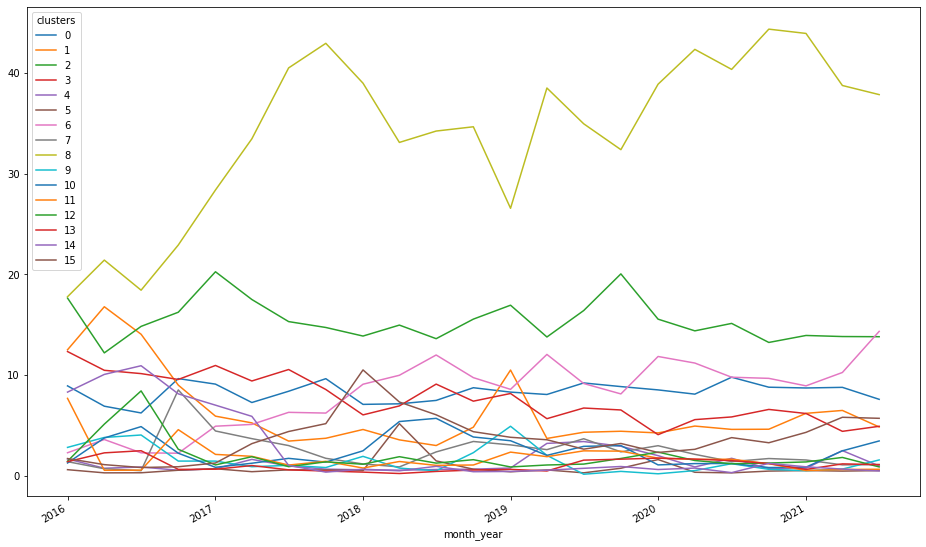

In [8]:
seva = df_ts3.plot(figsize=(16,10), use_index=True,x_compat=True)
seva.figure.savefig(f'{results_folder}/07a - Topics over time.png')

# Build co occurence matrix for analysis

In [395]:
# sklearn countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
# Convert a collection of text documents to a matrix of token counts
cv = CountVectorizer(ngram_range=(1,2), stop_words = 'english', strip_accents='unicode', max_df = 0.95, min_df = 0.01, max_features = 30)
# matrix of token counts
X = cv.fit_transform(df['text1'])
Xc = (X.T * X) # matrix manipulation
Xc.setdiag(0) # set the diagonals to be zeroes as it's pointless to be 1

In [392]:
import pandas as pd
names = cv.get_feature_names() # This are the entity names (i.e. keywords)
df10 = pd.DataFrame(data = Xc.toarray(), columns = names, index = names)
df10.to_csv(f'{results_folder}/to gephi.csv', sep = ',')

In [393]:
df10

alts  blockchain  buy  currency  don  eth  ethereum  going  good  \
alts           0          94  148       348   96  164        94    103    75   
blockchain    94           0   74       773  116  527       683     60   133   
buy          148          74    0       239  336  157       128    155   121   
currency     348         773  239         0  149  396       823    152   172   
don           96         116  336       149    0   88        95    120    68   
eth          164         527  157       396   88    0       495     87   127   
ethereum      94         683  128       823   95  495         0     87   116   
going        103          60  155       152  120   87        87      0    56   
good          75         133  121       172   68  127       116     56     0   
just         126         132  396       228  343  204       129    195   129   
know          38          58  123       130  346   48        58     94    62   
like         133         141  212       261  276  154       165    167   118   
market       136         109  154       425  113  127       142    111    75   
money        108         127  359       426  291  110       135    124   123   
new           81         160   76       239   83  108       112     80    59   
people        86         129  298       267  331   75        89    144    98   
think         79          64  104       129  218   70        64    127    67   
time         136         106  396       284  185  107       109    140   129   
today         48          58  109       185   65   67        63     74    84   
trading       96         169  101       598   68  152       156     60    77   

            just  know  like  market  money  new  people  think  time  today  \
alts         126    38   133     136    108   81      86     79   136     48   
blockchain   132    58   141     109    127  160     129     64   106     58   
buy          396   123   212     154    359   76     298    104   396    109   
currency     228   130   261     425    426  239     267    129   284    185   
don          343   346   276     113    291   83     331    218   185     65   
eth          204    48   154     127    110  108      75     70   107     67   
ethereum     129    58   165     142    135  112      89     64   109     63   
going        195    94   167     111    124   80     144    127   140     74   
good         129    62   118      75    123   59      98     67   129     84   
just           0   189   466     209    265  153     289    196   510    120   
know         189     0   132      57    146   46     213     96    89     57   
like         466   132     0     143    228  169     306    149   207     98   
market       209    57   143       0    124  109     161    111   193     71   
money        265   146   228     124      0  202     352    117   299    157   
new          153    46   169     109    202    0      89     52   140     65   
people       289   213   306     161    352   89       0    219   190     80   
think        196    96   149     111    117   52     219      0   121     43   
time         510    89   207     193    299  140     190    121     0    176   
today        120    57    98      71    157   65      80     43   176      0   
trading      115    57    77     318    116   55      73     57    75     57   

            trading  
alts             96  
blockchain      169  
buy             101  
currency        598  
don              68  
eth             152  
ethereum        156  
going            60  
good             77  
just            115  
know             57  
like             77  
market          318  
money           116  
new              55  
people           73  
think            57  
time             75  
today            57  
trading           0

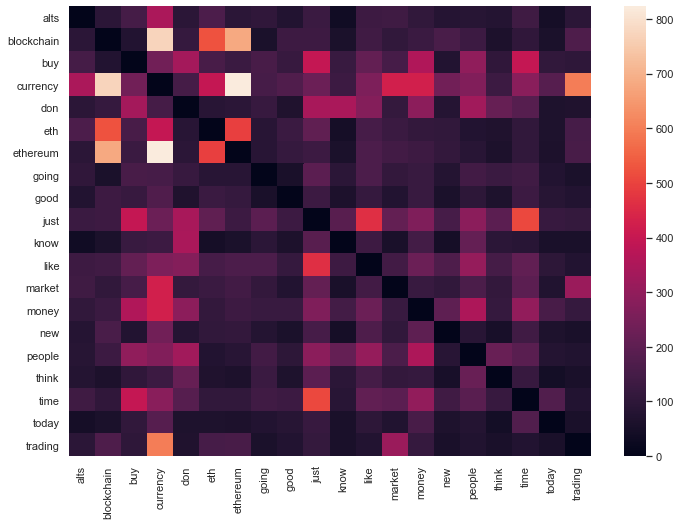

In [396]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.heatmap(df10)

# output topics and terms

In [299]:
df_tf

Term  Frequency     Topic
0    people   0.024215   Topic 0
1     money   0.015468   Topic 0
2     thing   0.008953   Topic 0
3      time   0.008736   Topic 0
4       buy   0.008622   Topic 0
..      ...        ...       ...
25      app   0.004636  Topic 17
26     bank   0.004636  Topic 17
27   follow   0.004382  Topic 17
28    check   0.004306  Topic 17
29  twitter   0.004129  Topic 17

[540 rows x 3 columns]

In [300]:
df_tf2 = df_tf.groupby(['Topic'])['Term'].apply(lambda text: ''.join(text.to_string(index=False))).str.replace('(\\n)', ',').reset_index()

<ipython-input-300-a39af3926ecf>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_tf2 = df_tf.groupby(['Topic'])['Term'].apply(lambda text: ''.join(text.to_string(index=False))).str.replace('(\\n)', ',').reset_index()


In [301]:
df_tf2

Topic  \
0    Topic 0   
1    Topic 1   
2   Topic 10   
3   Topic 11   
4   Topic 12   
5   Topic 13   
6   Topic 14   
7   Topic 15   
8   Topic 16   
9   Topic 17   
10   Topic 2   
11   Topic 3   
12   Topic 4   
13   Topic 5   
14   Topic 6   
15   Topic 7   
16   Topic 8   
17   Topic 9   

                                                                                                   Term  
0       people,     money,     thing,      time,       buy,      talk,      good,      shit,    inve...  
1                 look_like,               currency,                    xrp,                    eth,...  
2                         win_play,                          game,                          play,   ...  
3              bank,    play_expert,   central_bank,         system,          money,       currency,...  
4                    doge,            doge_doge,                 scam,          daily_close,        ...  
5        buy,     alt,    time,     day,    sell,    year,    good,  market,   today,    week,    pu...  
6           number_google,                np_rt,            pump_dump,             eeuu_usa,        ...  
7                rate_sit,                  fee,                block,                 rate,        ...  
8        store_value,      marine_mtc,     transaction,   digital_asset,        exchange,      proof...  
9                wallet,                pay,               send,             accept,               f...  
10              long,           short,       long_term,            term,      short_term,satoshi_nak...  
11                   usd_market,               1h_timeframe,                 trade_idea,           r...  
12                   time_high,                      high,                      time,             ex...  
13            gold,         money,         stock,        market,      currency,           buy,  stoc...  
14          volume_advance,                volume,               advance,         follow_profit,    ...  
15                    gon_na,                      na,                     gon,                curre...  
16             blockchain,             currency,             ethereum,              project,        ...  
17                  bear_market,                bull_market,                     get_ta,            ...

In [302]:
df_tf2.to_csv(f'{results_folder}/08 - Topics.csv')

# get alpha

In [303]:
model2.alpha

array([0.44228789, 0.07556672, 0.08963518, 0.01258657, 0.01730306,
       0.09082336, 0.0172242 , 0.02524561, 0.14521428, 0.01810905,
       0.0314266 , 0.1109949 , 0.01643892, 0.48027276, 0.00505746,
       0.0120775 , 0.03205125, 0.1709487 ])

# Var stuff

In [331]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr

In [332]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [333]:
btc_price_df = pd.read_csv('data/BTC_USD_2013-10-01_2021-08-18-CoinDesk.csv', parse_dates=[1],  squeeze=True, date_parser=parser, index_col=1)

In [334]:
btc_price_df['BTC Price'] = btc_price_df['Closing Price (USD)']
btc_price_df['Date'] = btc_price_df.index
btc_price_df['Date1'] = pd.to_datetime(btc_price_df['Date']).dt.date
btc_price_df


Currency  Closing Price (USD)  24h Open (USD)  24h High (USD)  \
Date                                                                       
2013-10-01      BTC           123.654990      124.304660      124.751660   
2013-10-02      BTC           125.455000      123.654990      125.758500   
2013-10-03      BTC           108.584830      125.455000      125.665660   
2013-10-04      BTC           118.674660      108.584830      118.675000   
2013-10-05      BTC           121.338660      118.674660      121.936330   
...             ...                  ...             ...             ...   
2021-08-14      BTC         47654.729022    44433.880228    47861.031980   
2021-08-15      BTC         47004.357461    47810.373711    48126.473768   
2021-08-16      BTC         47144.842567    47099.469780    47370.906853   
2021-08-17      BTC         46181.730824    47004.047648    48048.744781   
2021-08-18      BTC         44887.242787    45930.416150    47137.389263   

            24h Low (USD)     BTC Price       Date       Date1  
Date                                                            
2013-10-01     122.563490    123.654990 2013-10-01  2013-10-01  
2013-10-02     123.633830    125.455000 2013-10-02  2013-10-02  
2013-10-03      83.328330    108.584830 2013-10-03  2013-10-03  
2013-10-04     107.058160    118.674660 2013-10-04  2013-10-04  
2013-10-05     118.005660    121.338660 2013-10-05  2013-10-05  
...                   ...           ...        ...         ...  
2021-08-14   44264.697085  47654.729022 2021-08-14  2021-08-14  
2021-08-15   46063.802197  47004.357461 2021-08-15  2021-08-15  
2021-08-16   45619.599550  47144.842567 2021-08-16  2021-08-16  
2021-08-17   45694.801774  46181.730824 2021-08-17  2021-08-17  
2021-08-18   44460.220565  44887.242787 2021-08-18  2021-08-18  

[2864 rows x 8 columns]

In [335]:
btc_price_df2 = btc_price_df.asfreq(pd.infer_freq(btc_price_df.index))
btc_price_df2

Currency  Closing Price (USD)  24h Open (USD)  24h High (USD)  \
Date                                                                       
2013-10-01      BTC           123.654990      124.304660      124.751660   
2013-10-02      BTC           125.455000      123.654990      125.758500   
2013-10-03      BTC           108.584830      125.455000      125.665660   
2013-10-04      BTC           118.674660      108.584830      118.675000   
2013-10-05      BTC           121.338660      118.674660      121.936330   
...             ...                  ...             ...             ...   
2021-08-14      BTC         47654.729022    44433.880228    47861.031980   
2021-08-15      BTC         47004.357461    47810.373711    48126.473768   
2021-08-16      BTC         47144.842567    47099.469780    47370.906853   
2021-08-17      BTC         46181.730824    47004.047648    48048.744781   
2021-08-18      BTC         44887.242787    45930.416150    47137.389263   

            24h Low (USD)     BTC Price       Date       Date1  
Date                                                            
2013-10-01     122.563490    123.654990 2013-10-01  2013-10-01  
2013-10-02     123.633830    125.455000 2013-10-02  2013-10-02  
2013-10-03      83.328330    108.584830 2013-10-03  2013-10-03  
2013-10-04     107.058160    118.674660 2013-10-04  2013-10-04  
2013-10-05     118.005660    121.338660 2013-10-05  2013-10-05  
...                   ...           ...        ...         ...  
2021-08-14   44264.697085  47654.729022 2021-08-14  2021-08-14  
2021-08-15   46063.802197  47004.357461 2021-08-15  2021-08-15  
2021-08-16   45619.599550  47144.842567 2021-08-16  2021-08-16  
2021-08-17   45694.801774  46181.730824 2021-08-17  2021-08-17  
2021-08-18   44460.220565  44887.242787 2021-08-18  2021-08-18  

[2879 rows x 8 columns]

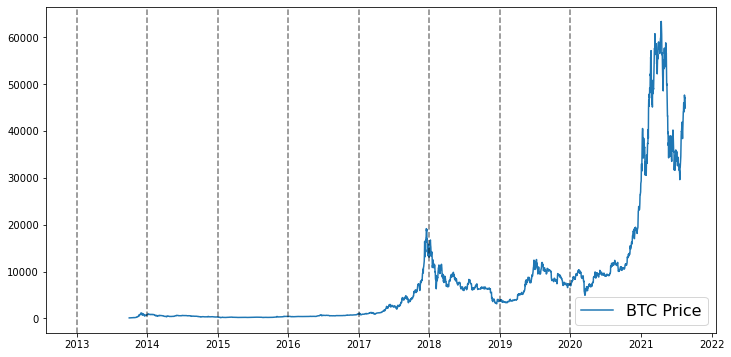

In [336]:
plt.figure(figsize=(12,6))
btc_price_df2, = plt.plot(btc_price_df2['BTC Price'])
#heater, = plt.plot(ice_cream_heater_df['heater'], color='red')

for year in range(2013, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)

plt.legend(['BTC Price'
            #, 'Heater'
           ], fontsize=16)


In [337]:
df['day_date'] = df['date1'].dt.to_period( freq = 'd')
df['date1'] = pd.to_datetime(df.date1).dt.tz_localize(None)
df['date2'] = df['date1'].dt.tz_localize(None)
df['date3'] = pd.to_datetime(df.date2)
df['date4'] = pd.to_datetime(df['date3']).dt.date
#get it by week


# change to a proportion of the 300

In [312]:
# def getweek(date):
#     #get weekyear
#     date = date.isocalendar()[1]
#     return date

# def getyear(date):
#     #get weekyear
#     date = date.isocalendar()[0]
#     return date
# #apply clean
# df['week'] = df['date1'].map(getweek)
# df['year2'] = df['date1'].map(getyear)

In [338]:
df

date  \
0      2016-07-02 18:02:46+00:00   
1      2016-11-25 19:11:23+00:00   
2      2016-07-30 22:06:02+00:00   
3      2021-02-22 23:32:13+00:00   
4      2019-04-16 21:58:35+00:00   
...                          ...   
54798  2018-09-12 23:18:15+00:00   
54799  2021-07-02 22:57:35+00:00   
54800  2017-12-26 23:15:19+00:00   
54801  2020-03-09 23:02:50+00:00   
54802  2019-06-19 23:21:27+00:00   

                                                                                                      text  \
0                                                    seems like the machine is keeping bitcoin below $700.   
1      boingboing: rt xeni: i will personally recount all of the votes for a mere $100,000 payable in b...   
2      whatever the mind of man can conceive and believe, marinecoin #mtc can achieve. #bitcoin marcel ...   
3                                                             #btc is not a sound byte... it’s sound money   
4      many coins still need about a 10x push to ath, and it will happen soon. so will btc pull 10x soo...   
...                                                                                                    ...   
54798                                                             news_mainstream 👍 #bitcoin #btc #economy   
54799  #bitcoin $btc has literally been getting piledriven and set on fire with all the fud in the medi...   
54800  yal keep saying kim got stocks stfu if somebody of our age buy you stocks it’s gone be bitcoin 😂...   
54801  this coronavirus was an unexpected event i didnt forsee.\n\nwished i had. now am going to manage...   
54802  who else has noticed newly launched assets being automatically accepted as a pair to $btc and no...   

                                                                                                     text1  \
0                                                              seems like the machine is keeping  below  .   
1      boingboing: rt xeni: i will personally recount all of the votes for a mere  ,000 payable in  or ...   
2            whatever the mind of man can conceive and believe, marine #mtc can achieve. # marcel albarazi   
3                                                                # is not a sound byte... it's sound money   
4      many s still need about a 10x push to ath, and it will happen soon. so will  pull 10x soon as we...   
...                                                                                                    ...   
54798                                                                       news_mainstream 👍 # # #economy   
54799  #   has literally been getting piledriven and set on fire with all the fud in the media, china a...   
54800  yal keep saying kim got stocks stfu if somebody of our age buy you stocks it's gone be  😂😂 just ...   
54801  this coronavirus was an unexpected event i didnt forsee. wished i had. now am going to manage ac...   
54802  who else has noticed newly launched assets being automatically accepted as a pair to   and not m...   

       count_num  \
0              3   
1              6   
2              0   
3              0   
4              4   
...          ...   
54798          0   
54799          4   
54800          0   
54801          3   
54802          0   

                                                                                                     text2  \
0                                                 (seems, like, the, machine, is, keeping,  , below,  , .)   
1      (boingboing, :, rt, xeni, :, i, will, personally, recount, all, of, the, votes, for, a, mere,  ,...   
2      (whatever, the, mind, of, man, can, conceive, and, believe, ,, marine, #, mtc, can, achieve, ., ...   
3                                                  (#, is, not, a, sound, byte, ..., it, 's, sound, money)   
4      (many, s, still, need, about, a, 10x, push, to, ath, ,, and, it, will, happen, soon, ., so, will...   
...                                                 

In [314]:
# df['week_yr'] = pd.to_datetime(df['year2'].astype(str) + ' ' + df['week'].astype(str) + ' 1',
#                                 format='%Y %U %w')

In [315]:
# df['week_year2'] = df['year2'].astype(str)+"_" +df['week'].astype(str)

In [345]:
df

date  \
0      2016-07-02 18:02:46+00:00   
1      2016-11-25 19:11:23+00:00   
2      2016-07-30 22:06:02+00:00   
3      2021-02-22 23:32:13+00:00   
4      2019-04-16 21:58:35+00:00   
...                          ...   
54798  2018-09-12 23:18:15+00:00   
54799  2021-07-02 22:57:35+00:00   
54800  2017-12-26 23:15:19+00:00   
54801  2020-03-09 23:02:50+00:00   
54802  2019-06-19 23:21:27+00:00   

                                                                                                      text  \
0                                                    seems like the machine is keeping bitcoin below $700.   
1      boingboing: rt xeni: i will personally recount all of the votes for a mere $100,000 payable in b...   
2      whatever the mind of man can conceive and believe, marinecoin #mtc can achieve. #bitcoin marcel ...   
3                                                             #btc is not a sound byte... it’s sound money   
4      many coins still need about a 10x push to ath, and it will happen soon. so will btc pull 10x soo...   
...                                                                                                    ...   
54798                                                             news_mainstream 👍 #bitcoin #btc #economy   
54799  #bitcoin $btc has literally been getting piledriven and set on fire with all the fud in the medi...   
54800  yal keep saying kim got stocks stfu if somebody of our age buy you stocks it’s gone be bitcoin 😂...   
54801  this coronavirus was an unexpected event i didnt forsee.\n\nwished i had. now am going to manage...   
54802  who else has noticed newly launched assets being automatically accepted as a pair to $btc and no...   

                                                                                                     text1  \
0                                                              seems like the machine is keeping  below  .   
1      boingboing: rt xeni: i will personally recount all of the votes for a mere  ,000 payable in  or ...   
2            whatever the mind of man can conceive and believe, marine #mtc can achieve. # marcel albarazi   
3                                                                # is not a sound byte... it's sound money   
4      many s still need about a 10x push to ath, and it will happen soon. so will  pull 10x soon as we...   
...                                                                                                    ...   
54798                                                                       news_mainstream 👍 # # #economy   
54799  #   has literally been getting piledriven and set on fire with all the fud in the media, china a...   
54800  yal keep saying kim got stocks stfu if somebody of our age buy you stocks it's gone be  😂😂 just ...   
54801  this coronavirus was an unexpected event i didnt forsee. wished i had. now am going to manage ac...   
54802  who else has noticed newly launched assets being automatically accepted as a pair to   and not m...   

       count_num  \
0              3   
1              6   
2              0   
3              0   
4              4   
...          ...   
54798          0   
54799          4   
54800          0   
54801          3   
54802          0   

                                                                                                     text2  \
0                                                 (seems, like, the, machine, is, keeping,  , below,  , .)   
1      (boingboing, :, rt, xeni, :, i, will, personally, recount, all, of, the, votes, for, a, mere,  ,...   
2      (whatever, the, mind, of, man, can, conceive, and, believe, ,, marine, #, mtc, can, achieve, ., ...   
3                                                  (#, is, not, a, sound, byte, ..., it, 's, sound, money)   
4      (many, s, still, need, about, a, 10x, push, to, ath, ,, and, it, will, happen, soon, ., so, will...   
...                                                 

In [350]:
df = df.sort_values(by="date")

In [351]:
df.date.unique()

array(['2016-01-02 15:07:38+00:00', '2016-01-02 15:16:45+00:00',
       '2016-01-02 15:34:43+00:00', ..., '2021-08-23 23:57:13+00:00',
       '2021-08-23 23:57:58+00:00', '2021-08-23 23:59:57+00:00'],
      dtype=object)

In [348]:
df2 = df.loc[df["clusters"] == 13]
df2.value_counts(["date4", "clusters"])
dfts1 = df2.groupby(by=["date4"], as_index=False).size()

In [349]:
dfts1


day_date  size
0     2016-01-02     2
1     2016-01-04     4
2     2016-01-06     4
3     2016-01-08     3
4     2016-01-10     7
...          ...   ...
1021  2021-08-15    18
1022  2021-08-17    22
1023  2021-08-19    20
1024  2021-08-21    29
1025  2021-08-23    21

[1026 rows x 2 columns]

In [342]:
merged_left = pd.merge(left=dfts1[['date4', 'size']], right=btc_price_df[['BTC Price', 'Date1']], how='left', left_on = 'date4', right_on='Date1')

In [354]:
merged_left

date4  size     BTC Price       Date1
0     2016-01-02     2    433.773000  2016-01-02
1     2016-01-04     4    431.691000  2016-01-04
2     2016-01-06     4    427.164000  2016-01-06
3     2016-01-08     3    457.168000  2016-01-08
4     2016-01-10     7    445.327000  2016-01-10
...          ...   ...           ...         ...
1021  2021-08-15    18  47004.357461  2021-08-15
1022  2021-08-17    22  46181.730824  2021-08-17
1023  2021-08-19    20           NaN         NaN
1024  2021-08-21    29           NaN         NaN
1025  2021-08-23    21           NaN         NaN

[1026 rows x 4 columns]

In [321]:
merged_left['Date1'].is_unique

True

In [355]:
dft = merged_left[['date4', 'BTC Price', 'size']]

In [356]:
dft

date4     BTC Price  size
0     2016-01-02    433.773000     2
1     2016-01-04    431.691000     4
2     2016-01-06    427.164000     4
3     2016-01-08    457.168000     3
4     2016-01-10    445.327000     7
...          ...           ...   ...
1021  2021-08-15  47004.357461    18
1022  2021-08-17  46181.730824    22
1023  2021-08-19           NaN    20
1024  2021-08-21           NaN    29
1025  2021-08-23           NaN    21

[1026 rows x 3 columns]

In [357]:
#duplicates
merged_left[merged_left.duplicated(['Date1'], keep=False)]

date4  size  BTC Price Date1
511   2018-10-30    14        NaN   NaN
515   2018-11-07    11        NaN   NaN
525   2018-11-27    25        NaN   NaN
526   2018-11-29    11        NaN   NaN
534   2018-12-15    13        NaN   NaN
541   2018-12-29    13        NaN   NaN
1023  2021-08-19    20        NaN   NaN
1024  2021-08-21    29        NaN   NaN
1025  2021-08-23    21        NaN   NaN

In [358]:
dft = dft.bfill()
dft[dft.isna().any(axis=1)]
dft1 = dft
dft1['datetest'] = dft.index
dft['size2'] = dft['size']*5000

In [359]:
dft

date4     BTC Price  size  datetest   size2
0     2016-01-02    433.773000     2         0   10000
1     2016-01-04    431.691000     4         1   20000
2     2016-01-06    427.164000     4         2   20000
3     2016-01-08    457.168000     3         3   15000
4     2016-01-10    445.327000     7         4   35000
...          ...           ...   ...       ...     ...
1021  2021-08-15  47004.357461    18      1021   90000
1022  2021-08-17  46181.730824    22      1022  110000
1023  2021-08-19           NaN    20      1023  100000
1024  2021-08-21           NaN    29      1024  145000
1025  2021-08-23           NaN    21      1025  105000

[1026 rows x 5 columns]

In [360]:
dft = dft.set_index('date4')

In [361]:
dft

BTC Price  size  datetest   size2
date4                                           
2016-01-02    433.773000     2         0   10000
2016-01-04    431.691000     4         1   20000
2016-01-06    427.164000     4         2   20000
2016-01-08    457.168000     3         3   15000
2016-01-10    445.327000     7         4   35000
...                  ...   ...       ...     ...
2021-08-15  47004.357461    18      1021   90000
2021-08-17  46181.730824    22      1022  110000
2021-08-19           NaN    20      1023  100000
2021-08-21           NaN    29      1024  145000
2021-08-23           NaN    21      1025  105000

[1026 rows x 4 columns]

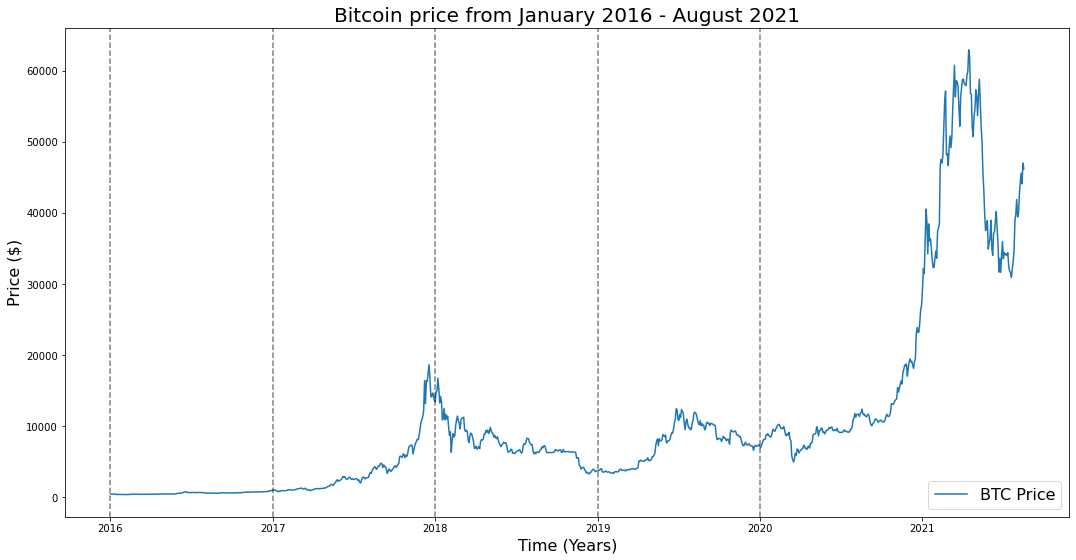

In [363]:
plt.figure(figsize=(18,9))
BTCprice, = plt.plot(dft['BTC Price'])
#size, = plt.plot(dft['size2'], color='red')

for year in range(2016, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
plt.title("Bitcoin price from January 2016 - August 2021", fontsize = 20)
plt.xlabel('Time (Years)', fontsize=16)
plt.ylabel('Price ($)', fontsize=16)
plt.legend(['BTC Price'], fontsize=16)
plt.savefig(f'{results_folder}/08 - BTC Price.png')

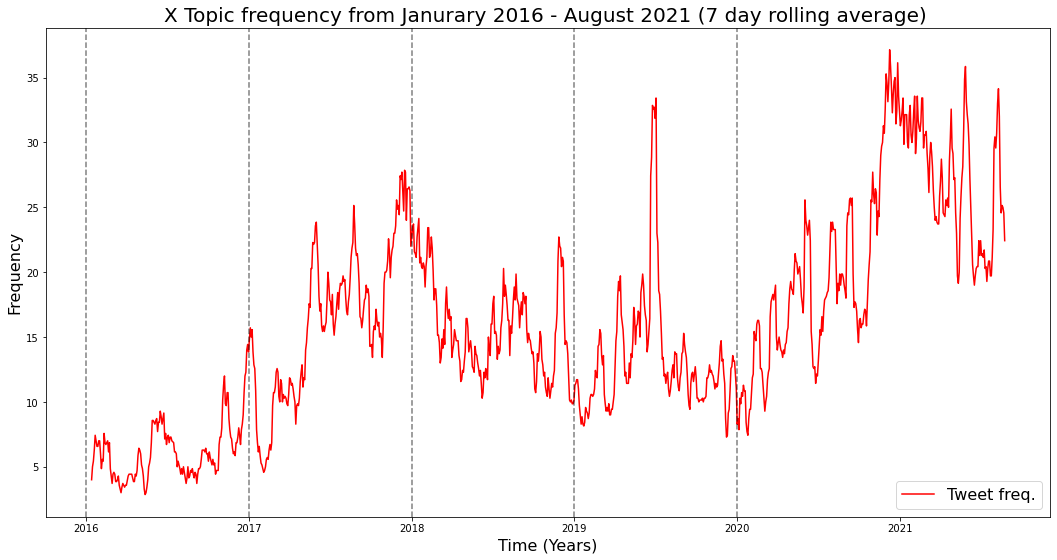

In [364]:
# do rolling average of the normalised data
dft['rollavg_size'] = dft['size'].rolling(7).mean()
plt.figure(figsize=(18,9))
BTCprice, = plt.plot(dft['rollavg_size'], color='red')
#size, = plt.plot(dft['size2'], color='red')

for year in range(2016, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
plt.title("X Topic frequency from Janurary 2016 - August 2021 (7 day rolling average) ", fontsize = 20)
plt.xlabel('Time (Years)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.legend(['Tweet freq.'], fontsize=16)
plt.savefig(f'{results_folder}/09 - Topic tweet frequency.png')

# normalise

In [365]:
dft1 = dft[['BTC Price', 'size']]
avgs = dft1.mean()
devs = dft1.std()
for col in dft1.columns:
    dft1[col] = (dft1[col] - avgs.loc[col]) / devs.loc[col]

<ipython-input-365-8ce1f9001875>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft1[col] = (dft1[col] - avgs.loc[col]) / devs.loc[col]


In [366]:
dft1


BTC Price      size
date4                          
2016-01-02  -0.753655 -1.411325
2016-01-04  -0.753813 -1.204819
2016-01-06  -0.754155 -1.204819
2016-01-08  -0.751884 -1.308072
2016-01-10  -0.752780 -0.895060
...               ...       ...
2021-08-15   2.771589  0.240722
2021-08-17   2.709319  0.653734
2021-08-19        NaN  0.447228
2021-08-21        NaN  1.376504
2021-08-23        NaN  0.550481

[1026 rows x 2 columns]

<ipython-input-368-68be964f5a72>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft1['rollavg_size'] = dft1['size'].rolling(7).mean()


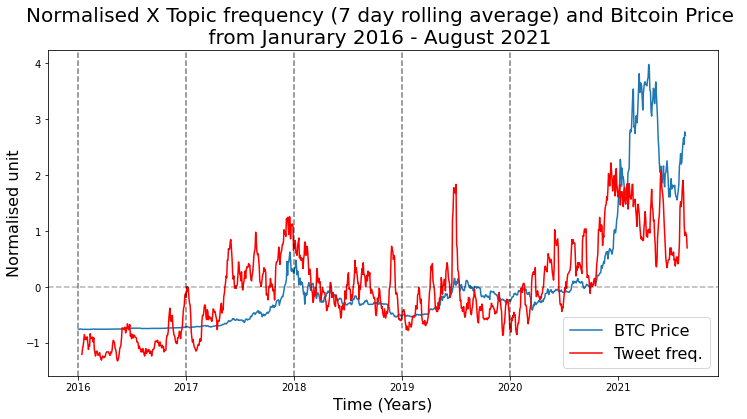

In [368]:
# do rolling average of the normalised data
dft1['rollavg_size'] = dft1['size'].rolling(7).mean()
plt.figure(figsize=(12,6))
BTCPrice, = plt.plot(dft1['BTC Price'])
size, = plt.plot(dft1['rollavg_size'], color='red')

for year in range(2016, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.title("Normalised X Topic frequency (7 day rolling average) and Bitcoin Price \n from Janurary 2016 - August 2021  ", fontsize = 20)
plt.xlabel('Time (Years)', fontsize=16)
plt.ylabel('Normalised unit', fontsize=16)
plt.legend(['BTC Price','Tweet freq.'], fontsize=16)
plt.savefig(f'{results_folder}/09 - Topic tweet frequency.png')

# take first difference to remove trend

In [369]:
dft1 = dft1.diff().dropna()


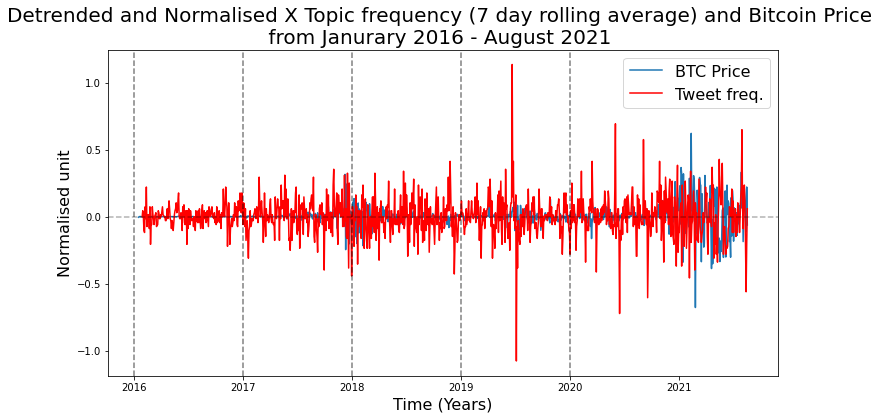

In [370]:
dft1['rollavg_size'] = dft1['size'].rolling(7).mean()
plt.figure(figsize=(12,6))
BTCPrice, = plt.plot(dft1['BTC Price'])
size, = plt.plot(dft1['rollavg_size'], color='red')

for year in range(2016, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.title("Detrended and Normalised X Topic frequency (7 day rolling average) and Bitcoin Price \n from Janurary 2016 - August 2021  ", fontsize = 20)
plt.xlabel('Time (Years)', fontsize=16)
plt.ylabel('Normalised unit', fontsize=16)
plt.legend(['BTC Price','Tweet freq.'], fontsize=16)
plt.savefig(f'{results_folder}/10 - Normalised.png')

# remove increasing volatility 

In [371]:
dft1.index = pd.to_datetime(dft1.index)
annual_volatility = dft1.groupby(dft1.index.year).std()
dft1['BTC_annual_vol'] = dft1.index.map(lambda d: annual_volatility.loc[d.year, 'BTC Price'])
dft1['size_annual_vol'] = dft1.index.map(lambda d: annual_volatility.loc[d.year, 'size'])

In [372]:
dft1['BTC Price'] = dft1['BTC Price'] / dft1['BTC_annual_vol']
dft1['size'] = dft1['size'] / dft1['size_annual_vol']

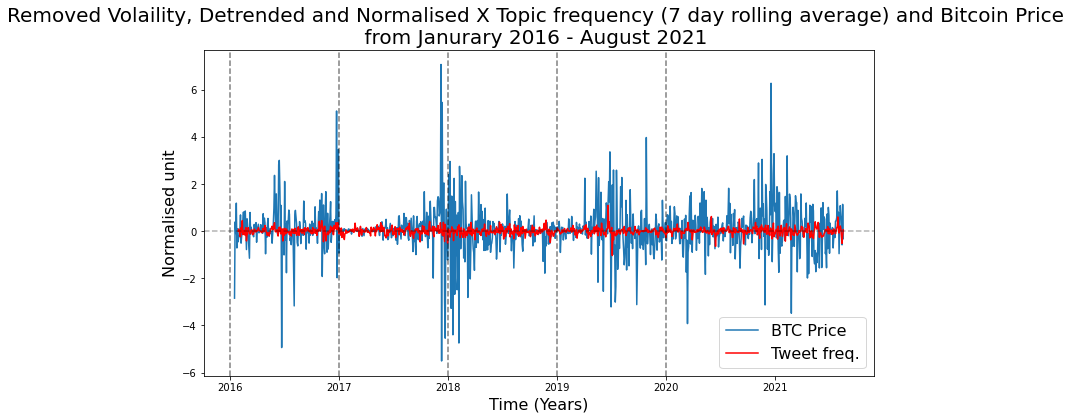

In [373]:
dft1['rollavg_size'] = dft1['size'].rolling(7).mean()
plt.figure(figsize=(12,6))
BTCPrice, = plt.plot(dft1['BTC Price'])
size, = plt.plot(dft1['rollavg_size'], color='red')

for year in range(2016, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.title("Removed Volaility, Detrended and Normalised X Topic frequency (7 day rolling average) and Bitcoin Price \n from Janurary 2016 - August 2021  ", fontsize = 20)
plt.xlabel('Time (Years)', fontsize=16)
plt.ylabel('Normalised unit', fontsize=16)
plt.legend(['BTC Price','Tweet freq.'], fontsize=16)
plt.savefig(f'{results_folder}/11 - Removed Volatility.png')

# Remove seasonality

In [374]:
month_avgs = dft1.groupby(dft1.index.month).mean()
dft1['BTC_month_avg'] = dft1.index.map(lambda d: month_avgs.loc[d.month, 'BTC Price'])
dft1['size_month_avg'] = dft1.index.map(lambda d: month_avgs.loc[d.month, 'size'])
dft1['BTC Price'] = dft1['BTC Price'] - dft1['BTC_month_avg']
dft1['size'] = dft1['size'] - dft1['size_month_avg']

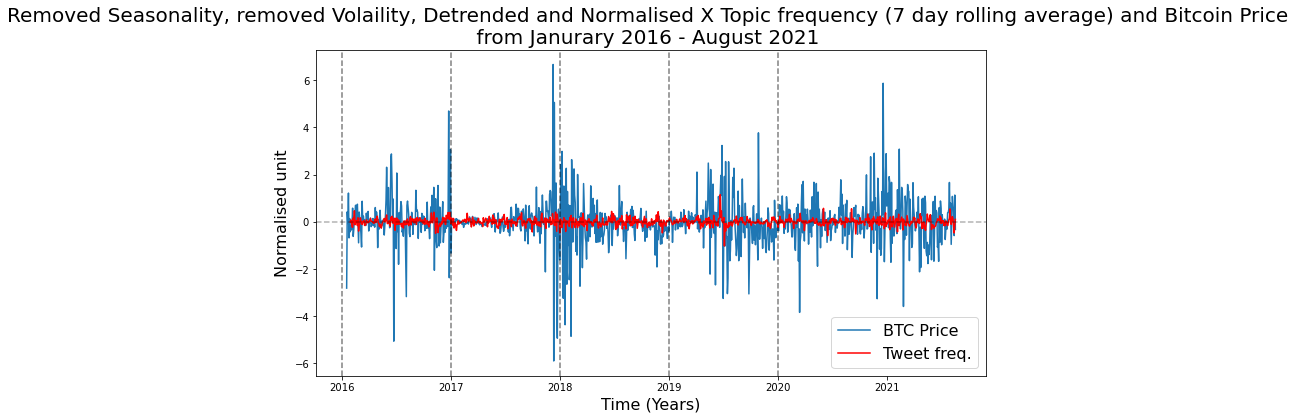

In [375]:
dft1['rollavg_size'] = dft1['size'].rolling(7).mean()
plt.figure(figsize=(12,6))
BTCPrice, = plt.plot(dft1['BTC Price'])
size, = plt.plot(dft1['rollavg_size'], color='red')

for year in range(2016, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.title("Removed Seasonality, removed Volaility, Detrended and Normalised X Topic frequency (7 day rolling average) and Bitcoin Price \n from Janurary 2016 - August 2021  ", fontsize = 20)
plt.xlabel('Time (Years)', fontsize=16)
plt.ylabel('Normalised unit', fontsize=16)
plt.legend(['BTC Price','Tweet freq.'], fontsize=16)
plt.savefig(f'{results_folder}/12 - Remove seasonality.png')

# VAr Model

In [380]:
dft1

BTC Price      size  rollavg_size  BTC_annual_vol  \
date4                                                           
2016-01-16  -2.811082  1.451612           NaN        0.001563   
2016-01-18   0.422512 -0.426814           NaN        0.001563   
2016-01-20  -0.067810  0.616756           NaN        0.001563   
2016-01-22   1.217723  0.199328           NaN        0.001563   
2016-01-24  -0.682577 -1.470384           NaN        0.001563   
...               ...       ...           ...             ...   
2021-08-09   0.652781  0.428730      0.126499        0.194843   
2021-08-11   0.496144 -1.485093     -0.173501        0.194843   
2021-08-13  -0.584168  0.715803     -0.473501        0.194843   
2021-08-15   1.134459 -0.815255     -0.145417        0.194843   
2021-08-17  -0.321734  0.428730      0.100646        0.194843   

            size_annual_vol  BTC_month_avg  size_month_avg  
date4                                                       
2016-01-16         0.494710      -0.031107        0.009386  
2016-01-18         0.494710      -0.031107        0.009386  
2016-01-20         0.494710      -0.031107        0.009386  
2016-01-22         0.494710      -0.031107        0.009386  
2016-01-24         0.494710      -0.031107        0.009386  
...                     ...            ...             ...  
2021-08-09         1.079023       0.002142       -0.045965  
2021-08-11         1.079023       0.002142       -0.045965  
2021-08-13         1.079023       0.002142       -0.045965  
2021-08-15         1.079023       0.002142       -0.045965  
2021-08-17         1.079023       0.002142       -0.045965  

[1016 rows x 7 columns]

In [378]:
dft1.index = pd.DatetimeIndex(dft1.index).to_period('d')
dft1

BTC Price      size  rollavg_size  BTC_annual_vol  \
date4                                                           
2016-01-16  -2.811082  1.451612           NaN        0.001563   
2016-01-18   0.422512 -0.426814           NaN        0.001563   
2016-01-20  -0.067810  0.616756           NaN        0.001563   
2016-01-22   1.217723  0.199328           NaN        0.001563   
2016-01-24  -0.682577 -1.470384           NaN        0.001563   
...               ...       ...           ...             ...   
2021-08-09   0.652781  0.428730      0.126499        0.194843   
2021-08-11   0.496144 -1.485093     -0.173501        0.194843   
2021-08-13  -0.584168  0.715803     -0.473501        0.194843   
2021-08-15   1.134459 -0.815255     -0.145417        0.194843   
2021-08-17  -0.321734  0.428730      0.100646        0.194843   

            size_annual_vol  BTC_month_avg  size_month_avg  
date4                                                       
2016-01-16         0.494710      -0.031107        0.009386  
2016-01-18         0.494710      -0.031107        0.009386  
2016-01-20         0.494710      -0.031107        0.009386  
2016-01-22         0.494710      -0.031107        0.009386  
2016-01-24         0.494710      -0.031107        0.009386  
...                     ...            ...             ...  
2021-08-09         1.079023       0.002142       -0.045965  
2021-08-11         1.079023       0.002142       -0.045965  
2021-08-13         1.079023       0.002142       -0.045965  
2021-08-15         1.079023       0.002142       -0.045965  
2021-08-17         1.079023       0.002142       -0.045965  

[1016 rows x 7 columns]

In [379]:
dft1var = dft1[['BTC Price', 'size']]
model = VAR(dft1var)
model_fit = model.fit(maxlags=30)
model_fit.summary()
# look at btc price, and those that are significant are the ones that impact btc price 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 16, Sep, 2021
Time:                     19:14:33
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   0.165901
Nobs:                     986.000    HQIC:                 -0.209312
Log likelihood:          -2459.42    FPE:                   0.644496
AIC:                    -0.439602    Det(Omega_mle):        0.571585
--------------------------------------------------------------------
Results for equation BTC Price
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.004129         0.031013            0.133           0.894
L1.BTC Price         -0.028518         0.032850           -0.868           0.385
L1.size               0.219862         0.041169         

#  PACF 

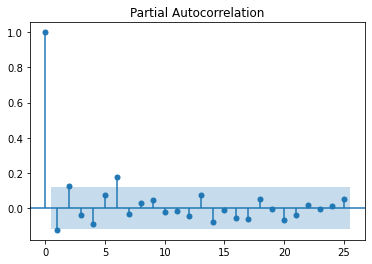

In [246]:
plot_pacf(dft1['BTC Price'])
plt.show()

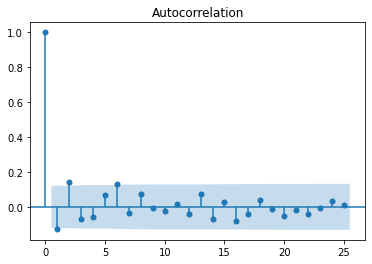

In [152]:
plot_acf(dft1['BTC Price'])
plt.show()

In [153]:
dft1

BTC Price      size  rollavg_size  BTC_annual_vol  \
date4                                                           
2016-03-08  -0.266327  0.155271  0.000000e+00             1.0   
2016-04-01  -0.075576  0.033682 -5.551115e-17             1.0   
2016-04-05   0.007201  0.033682  5.551115e-17             1.0   
2016-04-21   0.313865  0.033682 -5.551115e-17             1.0   
2016-04-25   0.179991  0.033682  5.551115e-17             1.0   
...               ...       ...           ...             ...   
2021-07-12  -0.073915 -0.955058  0.000000e+00             1.0   
2021-07-20  -0.955605  0.107398 -2.653560e-01             1.0   
2021-07-26   0.673363  0.107398  0.000000e+00             1.0   
2021-08-05   1.125906 -0.046469  0.000000e+00             1.0   
2021-08-09   0.943343  2.078443  2.653560e-01             1.0   

            size2_annual_vol  size_annual_vol  BTC_month_avg  size_month_avg  
date4                                                                         
2016-03-08          1.758793         1.758793      -0.120631       -0.155271  
2016-04-01          1.758793         1.758793       0.110756       -0.033682  
2016-04-05          1.758793         1.758793       0.110756       -0.033682  
2016-04-21          1.758793         1.758793       0.110756       -0.033682  
2016-04-25          1.758793         1.758793       0.110756       -0.033682  
...                      ...              ...            ...             ...  
2021-07-12          1.748300         1.748300       0.163221       -0.107398  
2021-07-20          1.748300         1.748300       0.163221       -0.107398  
2021-07-26          1.748300         1.748300       0.163221       -0.107398  
2021-08-05          1.748300         1.748300       0.084037        0.046469  
2021-08-09          1.748300         1.748300       0.084037        0.046469  

[266 rows x 8 columns]

In [248]:
for lag in range(1, 30):
    heater_series = dft1['BTC Price'].iloc[lag:]
    lagged_ice_cream_series = dft1['size'].iloc[:-lag]
    print('Lag: %s'%lag)
    print(pearsonr(heater_series, lagged_ice_cream_series))
    print('------')

Lag: 1
(0.02302010220529156, 0.7091350005852596)
------
Lag: 2
(-0.060393613601188195, 0.32831362172846285)
------
Lag: 3
(0.08590376947510737, 0.16481506416186498)
------
Lag: 4
(-0.07024691426444471, 0.257210447423236)
------
Lag: 5
(0.02398381741135231, 0.699743964322636)
------
Lag: 6
(-0.009192786860056229, 0.8827230714044042)
------
Lag: 7
(0.0009516571685305414, 0.9878395970435884)
------
Lag: 8
(-0.05786206519925364, 0.35462000403889665)
------
Lag: 9
(0.06494763268452237, 0.2996381266621653)
------
Lag: 10
(-0.00010616153621425747, 0.9986513587020618)
------
Lag: 11
(-0.06745408593311955, 0.2832325673134705)
------
Lag: 12
(-0.018821118418094737, 0.7653168583923372)
------
Lag: 13
(0.05343985068377855, 0.39732483645059014)
------
Lag: 14
(-0.03145171965237433, 0.6192445693458812)
------
Lag: 15
(0.025301209217545598, 0.6899598347132545)
------
Lag: 16
(-0.012748913683444402, 0.8410301571519145)
------
Lag: 17
(0.028436238682791694, 0.6552008801049463)
------
Lag: 18
(-0.154099

In [5]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
#series = read_csv('airline-passengers.csv', header=0, index_col=0)


In [33]:
btc_price_df2

Currency  Closing Price (USD)  24h Open (USD)  24h High (USD)  \
Date                                                                       
2013-10-01      BTC           123.654990      124.304660      124.751660   
2013-10-02      BTC           125.455000      123.654990      125.758500   
2013-10-03      BTC           108.584830      125.455000      125.665660   
2013-10-04      BTC           118.674660      108.584830      118.675000   
2013-10-05      BTC           121.338660      118.674660      121.936330   
...             ...                  ...             ...             ...   
2021-08-14      BTC         47654.729022    44433.880228    47861.031980   
2021-08-15      BTC         47004.357461    47810.373711    48126.473768   
2021-08-16      BTC         47144.842567    47099.469780    47370.906853   
2021-08-17      BTC         46181.730824    47004.047648    48048.744781   
2021-08-18      BTC         44887.242787    45930.416150    47137.389263   

            24h Low (USD)     BTC Price       Date       Date1  
Date                                                            
2013-10-01     122.563490    123.654990 2013-10-01  2013-10-01  
2013-10-02     123.633830    125.455000 2013-10-02  2013-10-02  
2013-10-03      83.328330    108.584830 2013-10-03  2013-10-03  
2013-10-04     107.058160    118.674660 2013-10-04  2013-10-04  
2013-10-05     118.005660    121.338660 2013-10-05  2013-10-05  
...                   ...           ...        ...         ...  
2021-08-14   44264.697085  47654.729022 2021-08-14  2021-08-14  
2021-08-15   46063.802197  47004.357461 2021-08-15  2021-08-15  
2021-08-16   45619.599550  47144.842567 2021-08-16  2021-08-16  
2021-08-17   45694.801774  46181.730824 2021-08-17  2021-08-17  
2021-08-18   44460.220565  44887.242787 2021-08-18  2021-08-18  

[2879 rows x 8 columns]

In [43]:
btc_price_df2 = btc_price_df.asfreq(pd.infer_freq(btc_price_df.index))
btc_price_df2
btc_price_df2 = btc_price_df2.fillna(method='bfill').fillna(method='ffill')

In [44]:
btc_price_df2

Currency  Closing Price (USD)  24h Open (USD)  24h High (USD)  \
Date                                                                       
2013-10-01      BTC           123.654990      124.304660      124.751660   
2013-10-02      BTC           125.455000      123.654990      125.758500   
2013-10-03      BTC           108.584830      125.455000      125.665660   
2013-10-04      BTC           118.674660      108.584830      118.675000   
2013-10-05      BTC           121.338660      118.674660      121.936330   
...             ...                  ...             ...             ...   
2021-08-14      BTC         47654.729022    44433.880228    47861.031980   
2021-08-15      BTC         47004.357461    47810.373711    48126.473768   
2021-08-16      BTC         47144.842567    47099.469780    47370.906853   
2021-08-17      BTC         46181.730824    47004.047648    48048.744781   
2021-08-18      BTC         44887.242787    45930.416150    47137.389263   

            24h Low (USD)     BTC Price       Date       Date1  
Date                                                            
2013-10-01     122.563490    123.654990 2013-10-01  2013-10-01  
2013-10-02     123.633830    125.455000 2013-10-02  2013-10-02  
2013-10-03      83.328330    108.584830 2013-10-03  2013-10-03  
2013-10-04     107.058160    118.674660 2013-10-04  2013-10-04  
2013-10-05     118.005660    121.338660 2013-10-05  2013-10-05  
...                   ...           ...        ...         ...  
2021-08-14   44264.697085  47654.729022 2021-08-14  2021-08-14  
2021-08-15   46063.802197  47004.357461 2021-08-15  2021-08-15  
2021-08-16   45619.599550  47144.842567 2021-08-16  2021-08-16  
2021-08-17   45694.801774  46181.730824 2021-08-17  2021-08-17  
2021-08-18   44460.220565  44887.242787 2021-08-18  2021-08-18  

[2879 rows x 8 columns]

<ipython-input-45-1448fd842f20>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(btc_price_df2['BTC Price'], freq=365)


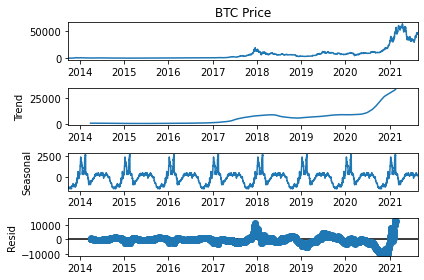

In [45]:
result = seasonal_decompose(btc_price_df2['BTC Price'], freq=365)
result.plot()
pyplot.show()

In [39]:
btc_price_df2['BTC Price']

Date
2013-10-01      123.654990
2013-10-02      125.455000
2013-10-03      108.584830
2013-10-04      118.674660
2013-10-05      121.338660
                  ...     
2021-08-14    47654.729022
2021-08-15    47004.357461
2021-08-16    47144.842567
2021-08-17    46181.730824
2021-08-18    44887.242787
Freq: D, Name: BTC Price, Length: 2879, dtype: float64

Currency  Closing Price (USD)  24h Open (USD)  24h High (USD)  \
Date                                                                       
2013-10-01      BTC           123.654990      124.304660      124.751660   
2013-10-02      BTC           125.455000      123.654990      125.758500   
2013-10-03      BTC           108.584830      125.455000      125.665660   
2013-10-04      BTC           118.674660      108.584830      118.675000   
2013-10-05      BTC           121.338660      118.674660      121.936330   
...             ...                  ...             ...             ...   
2021-08-14      BTC         47654.729022    44433.880228    47861.031980   
2021-08-15      BTC         47004.357461    47810.373711    48126.473768   
2021-08-16      BTC         47144.842567    47099.469780    47370.906853   
2021-08-17      BTC         46181.730824    47004.047648    48048.744781   
2021-08-18      BTC         44887.242787    45930.416150    47137.389263   

            24h Low (USD)     BTC Price       Date       Date1  
Date                                                            
2013-10-01     122.563490    123.654990 2013-10-01  2013-10-01  
2013-10-02     123.633830    125.455000 2013-10-02  2013-10-02  
2013-10-03      83.328330    108.584830 2013-10-03  2013-10-03  
2013-10-04     107.058160    118.674660 2013-10-04  2013-10-04  
2013-10-05     118.005660    121.338660 2013-10-05  2013-10-05  
...                   ...           ...        ...         ...  
2021-08-14   44264.697085  47654.729022 2021-08-14  2021-08-14  
2021-08-15   46063.802197  47004.357461 2021-08-15  2021-08-15  
2021-08-16   45619.599550  47144.842567 2021-08-16  2021-08-16  
2021-08-17   45694.801774  46181.730824 2021-08-17  2021-08-17  
2021-08-18   44460.220565  44887.242787 2021-08-18  2021-08-18  

[2879 rows x 8 columns]